# Eval runs

In [9]:
! pip install pandas
! pip install matplotlib
! pip install scipy
! pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 667.8 kB/s eta 0:00:01
   ---------------------- ----------------- 163.8/294.9 kB 2.0 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from pathlib import Path
import ast
import seaborn as sns

pd.set_option('display.max_columns', None)

In [27]:
def read_metrics_file(file_path):
    df = pd.read_csv(file_path, sep=" ", header=None, names=["Timestamp", "Value", "Label"])[["Value"]].iloc[-1]
    return df

def read_config_file(file_path):
    """
    Read configuration settings from a config.txt file.
    """
    with open(file_path, 'r') as file:
        txt = file.read().replace("device(type='cuda', index=0)", "0")
        config = ast.literal_eval(txt)
    return config

def read_metrics_and_config_from_directory(directory_root):
    """
    Read metrics from all files in a directory and its subdirectories recursively.
    """
    
    run_data = {}
    runs_path = Path(directory_root)
    # Iterate over all runs
    for run_dir in runs_path.glob('**/metrics'):
        metric_data = {}
        for metric_file in run_dir.iterdir():
            metric_data[metric_file.stem] = read_metrics_file(metric_file)
        
        if len(metric_data) == 0:
            print(metric_data)
            print(run_dir)
        combined_df = pd.concat(metric_data, axis=1)
        run_data[(run_dir.parent.parent.name, run_dir.parent.name)] = combined_df

    run_configs = {}
    # Iterate over all runs
    for run_dir in runs_path.glob('**/params'):
        for metric_file in run_dir.iterdir():
            config = read_config_file(metric_file)
        run_configs[(run_dir.parent.parent.name, run_dir.parent.name)] = config

    return run_data, run_configs

def load_dataframe(directory):
    # Read metrics from all files in the directory
    run_data, run_configs = read_metrics_and_config_from_directory(directory)

    modified_dfs = []
    for key, df in run_data.items():
        df['ml_run_experiment'] = key[0]
        df['ml_run_id'] = key[1]
        df['ml_run_name'] = run_configs[key]['RUN_NAME']
        modified_dfs.append(df)
    df_runs = pd.concat(modified_dfs, axis=0, ignore_index=True)
     
    return df_runs, run_configs

# Define the directory containing metric files
directory = 'C:\\Users\\Eduard\\PycharmProjects\\HM_IDENT_3DFR\\log\\mlruns'
df_runs, run_configs = load_dataframe(directory)
print(df_runs.shape, len(run_configs.items()))
df_runs.head(5)

(217, 33) 217


bellus_inter_enrolled_center_avg_distance  \
0                                   1.014162   
1                                   1.014782   
2                                   1.013754   
3                                   1.021303   
4                                   1.021275   

   bellus_intra_enrolled_avg_distance  bellus_intra_query_avg_distance  \
0                            7.399365                        38.752331   
1                            7.894942                        39.017295   
2                            7.589422                        38.857009   
3                            4.543225                        31.424404   
4                            4.464977                        31.832926   

   bellus_intra_scan_avg_distance  bellus_RR1  bellus_RR5  bellus_Voting_RR1  \
0                        7.459512       54.69       78.29              75.63   
1                        7.797213       57.68       82.66              78.99   
2                        7.620058       60.81       82.02              78.15   
3                        4.367466       70.69       87.33              77.31   
4                        4.535314       73.11       86.82              79.83   

   bellus_Voting_RR5  facescape_inter_enrolled_center_avg_distance  \
0              75.63                                      0.998207   
1              78.99                                      0.993459   
2              78.15                                      0.998609   
3              77.31                                      1.000276   
4              79.83                                      0.999142   

   facescape_intra_enrolled_avg_distance  facescape_intra_query_avg_distance  \
0                               9.421543                          159.053729   
1                              10.005063                          167.832797   
2                               9.782373                          164.916063   
3                               5.504636                           98.692054   
4                               5.635011                          101.279524   

   facescape_intra_scan_avg_distance  facescape_RR1  facescape_RR5  \
0                           8.092400          33.68          59.09   
1                           8.539805          33.79          59.58   
2                           8.368326          36.97          62.13   
3                           4.728259          66.07          87.06   
4                           4.836618          67.33          87.41   

   facescape_Voting_RR1  facescape_Voting_RR5  \
0                 82.71                 82.71   
1                 84.89                 84.89   
2                 84.01                 84.01   
3                 94.72                 94.72   
4                 94.78                 94.78   

   faceverse_inter_enrolled_center_avg_distance  \
0                                      1.002943   
1                                      1.003979   
2                                      1.002910   
3                                      1.006800   
4                                      1.006947   

   faceverse_intra_enrolled_avg_distance  faceverse_intra_query_avg_distance  \
0                               8.871978                          194.176484   
1                               9.154227                          202.180555   
2                               8.740208                          193.687314   
3                               3.518988                          105.203069   
4                               3.469691                          106.754758   

   faceverse_intra_scan_avg_distance  faceverse_RR1  faceverse_RR5  \
0                           9.015884          34.72          60.83   
1                           9.372734          28.69          52.33   
2                           8.898774          38.04          64.03   
3                           3.559619          70.65          86.20   
4                           3.57

In [28]:
#def translate_mlflow_to_experiment_name(run_configs, mlflow_run_experiment_ids, ml_run_ids):
#    x_ticks = []
#    for e,i in zip(mlflow_run_experiment_ids, ml_run_ids):
#        x_ticks.append(run_configs[(e,i)]['RUN_NAME'])
#    
#    unique_list = []
#    [unique_list.append(x) for x in x_ticks if x not in unique_list]
#    return unique_list

def plot_bar(df, rotation=45, figsize=(10, 10), voting = True, color_list=['skyblue', 'orange', 'lightgreen','red']) :# bar_columns, labels, title_suffix, color_list, rotation=45, annotate=True):

    ml_run_name = df['ml_run_name']
    xticks = []
    [xticks.append(x) for x in ml_run_name if x not in xticks]

    indices = np.arange(len(xticks))
    if voting:
        test_columns = ['bellus_Voting_RR1', 'facescape_Voting_RR1', 'faceverse_Voting_RR1', 'texas_Voting_RR1']
    else:
        test_columns = ['bellus_RR1', 'facescape_RR1', 'faceverse_RR1', 'texas_RR1']

    df_melted = pd.melt(df, id_vars=['ml_run_experiment'], value_vars=test_columns, 
                    var_name='Measure', value_name='Value')

    plt.figure(figsize=figsize)
    ax = sns.barplot(data=df_melted, x='ml_run_experiment', y='Value', hue='Measure', errorbar=('ci', 95), capsize=0.1, palette=color_list)

    # Add average values as text to the bars
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge")

    # Add horizontal lines for the rr_5 accuracies
    #top5_columns = ['bellus_RR5', 'facescape_RR5', 'faceverse_RR5', 'texas_RR5']
    #unique_experiments = df['ml_run_experiment'].unique()
    #width = 0.8 / len(unique_experiments)
    #for i, col in enumerate(top5_columns):
    #    for j, (experiment, value) in enumerate(zip(df['ml_run_experiment'], df[col])):
    ##        # Correct indexing for line positions
    #        x_position = j - width/2 + i*width + width/2
    #        plt.hlines(y=value, xmin=x_position - width/2, xmax=x_position + width/2, 
    #                colors=color_list[i], linestyles='dashed')
    #        plt.text(x_position, value, f'{value:.2f}', 
    #                ha='center', va='bottom', color=color_list[i])
    plt.xlabel('Experiment')
    plt.ylabel('Accuracy')
    plt.xticks(indices, xticks, rotation=rotation, ha='right')
    plt.tight_layout()

def analyse_embedding(df):
    plot_scatter_with_correlation_line(df['bellus_RR1'], df['bellus_inter_enrolled_center_avg_distance'], df['ml_run_experiment'], 'bellusRR1', 'bellus_inter_enrolled_center_avg_distance')
    plot_scatter_with_correlation_line(df['facescape_RR1'], df['facescape_inter_enrolled_center_avg_distance'], df['ml_run_experiment'], 'facescapeRR1', 'facescape_inter_enrolled_center_avg_distance')
    plot_scatter_with_correlation_line(df['bellus_RR1'], df['bellus_intra_enrolled_avg_distance'], df['ml_run_experiment'], 'bellusRR1', 'bellus_intra_enrolled_avg_distance')
    plot_scatter_with_correlation_line(df['facescape_RR1'], df['facescape_intra_enrolled_avg_distance'], df['ml_run_experiment'], 'facescapeRR1', 'facescape_intra_enrolled_avg_distance')
    plot_scatter_with_correlation_line(df['bellus_RR1'], df['bellus_intra_query_avg_distance'], df['ml_run_experiment'], 'bellusRR1', 'bellus_intra_query_avg_distance')
    plot_scatter_with_correlation_line(df['facescape_RR1'], df['facescape_intra_query_avg_distance'], df['ml_run_experiment'], 'facescapeRR1', 'facescape_intra_query_avg_distance')
    plot_scatter_with_correlation_line(df['bellus_RR1'], df['bellus_intra_scan_avg_distance'], df['ml_run_experiment'], 'bellusRR1', 'bellus_intra_scan_avg_distance')
    plot_scatter_with_correlation_line(df['facescape_RR1'], df['facescape_intra_scan_avg_distance'], df['ml_run_experiment'], 'facescapeRR1', 'facescape_intra_scan_avg_distance')
    plt.show()


# Function to plot a scatterplot with correlation line
def plot_scatter_with_correlation_line(x, y, labels, xlabel, ylabel):
    plt.figure(figsize=(7, 7))
    coefficients = np.polyfit(x, y, 1)
    poly = np.poly1d(coefficients)
    val_linspace = np.linspace(min(x), max(x), len(x))
    plt.scatter(x, y, color='green')
    plt.plot(val_linspace, poly(val_linspace), color='blue', linestyle='dashed', linewidth=2)
    for i, label in enumerate(labels):
        plt.text(x.iloc[i], y.iloc[i], label, fontsize=9, ha='right')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    correlation_coefficient, _ = pearsonr(x, y)
    print(f"Correlation coefficient: {correlation_coefficient:.3f}")
    
    
def analyze_accuracies(df, run_configs, voting):
    #xticks = translate_mlflow_to_experiment_name(run_configs, df['ml_run_experiment'], df['ml_run_id'])
    plot_bar(df, voting=voting)
    plt.show()

def select_runs(df, run_configs, rules):

    valid_keys = []
    for k,v in run_configs.items():
        accept = False
        for i in rules:
            if i in v['RUN_NAME']:
                accept = True
                break
        if accept:
            valid_keys.append(k[0])

    print('Selected:', len(valid_keys), valid_keys)

    filtered_df = df[df['ml_run_experiment'].isin(valid_keys)].copy()
    assert filtered_df.shape[0] == len(valid_keys)

    filtered_df['exp_id'] = filtered_df['ml_run_name'].str.extract(r'EXP(\d+)', expand=False).astype(int)
    filtered_df = filtered_df.sort_values('exp_id')
    return filtered_df



### EXP [1-6] rgb_bellus-45T_25P-enc_512-ArcFace-FocalLoss-112_112-batchsize_32-epochs50-\<MODEL\>

Selected: 18 ['222100124645481631', '222100124645481631', '222100124645481631', '363882690831110193', '363882690831110193', '363882690831110193', '415785875395131241', '415785875395131241', '415785875395131241', '491028380339639148', '491028380339639148', '491028380339639148', '748894875499767044', '748894875499767044', '748894875499767044', '891246952177035504', '891246952177035504', '891246952177035504']


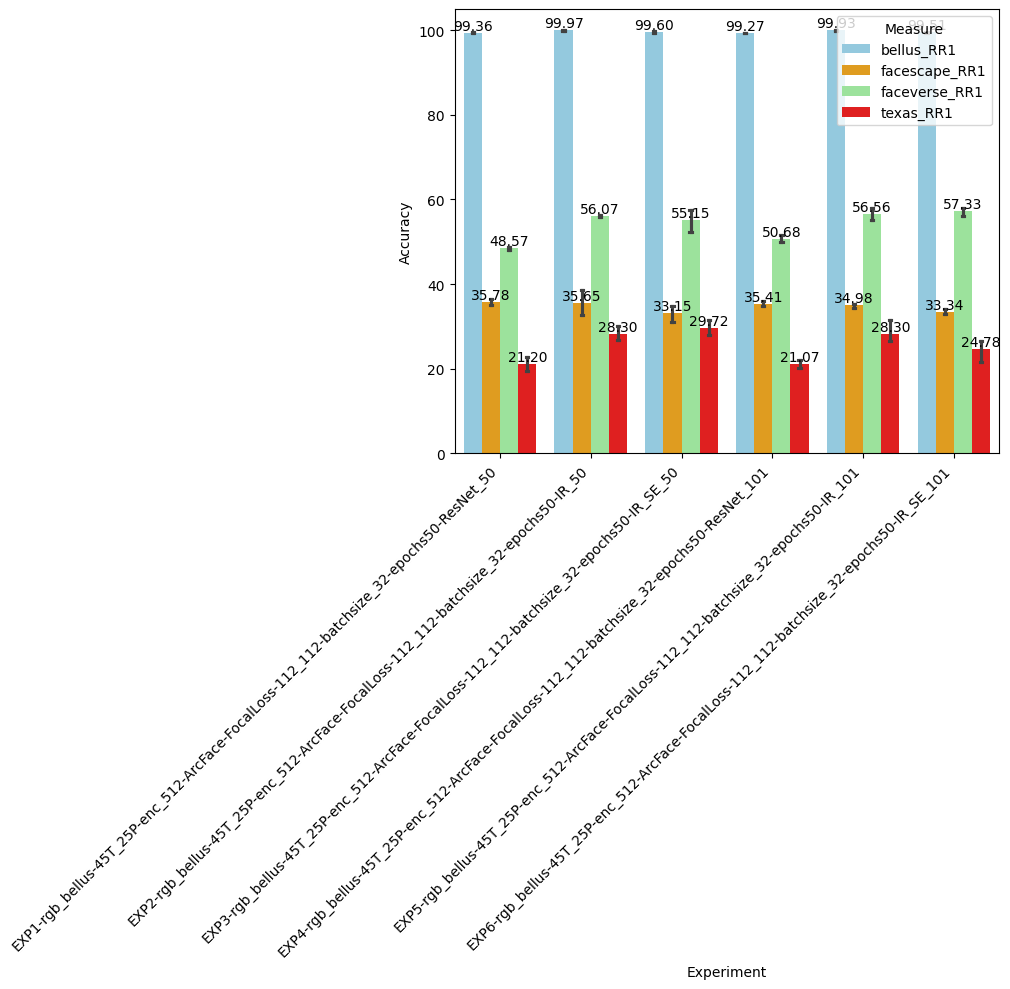

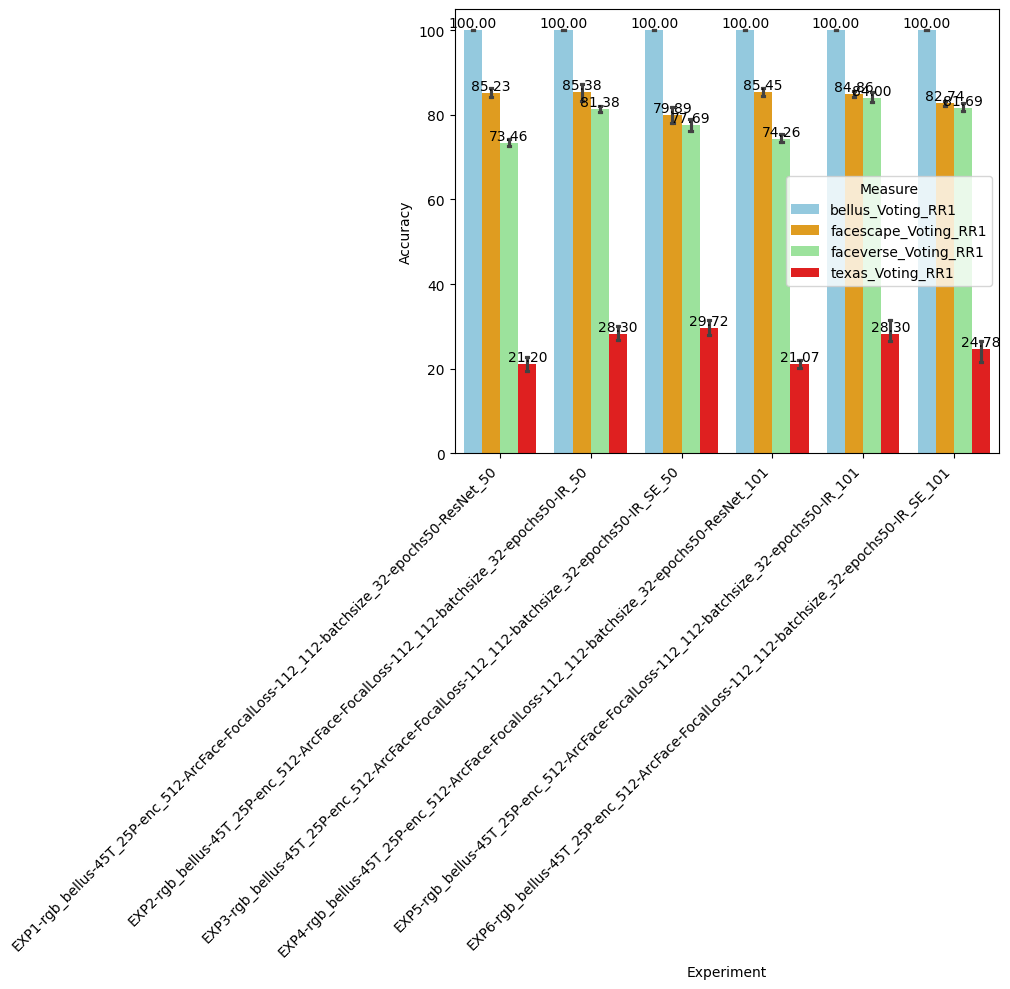

In [15]:
df_selected = select_runs(df_runs, run_configs, ['EXP1-','EXP2-','EXP3-','EXP4-','EXP5-','EXP6-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)
#analyse_embedding(df_selected)

### EXP [7-12] depth_bellus-45T_25P-enc_512-ArcFace-FocalLoss-112_112-batchsize_32-epochs50-\<MODEL\>

Selected: 17 ['345097637784570927', '345097637784570927', '345097637784570927', '475567269307092217', '475567269307092217', '475567269307092217', '498748654963359631', '498748654963359631', '498748654963359631', '761951322906666558', '761951322906666558', '828788881478631883', '828788881478631883', '828788881478631883', '926074714150533979', '926074714150533979', '926074714150533979']


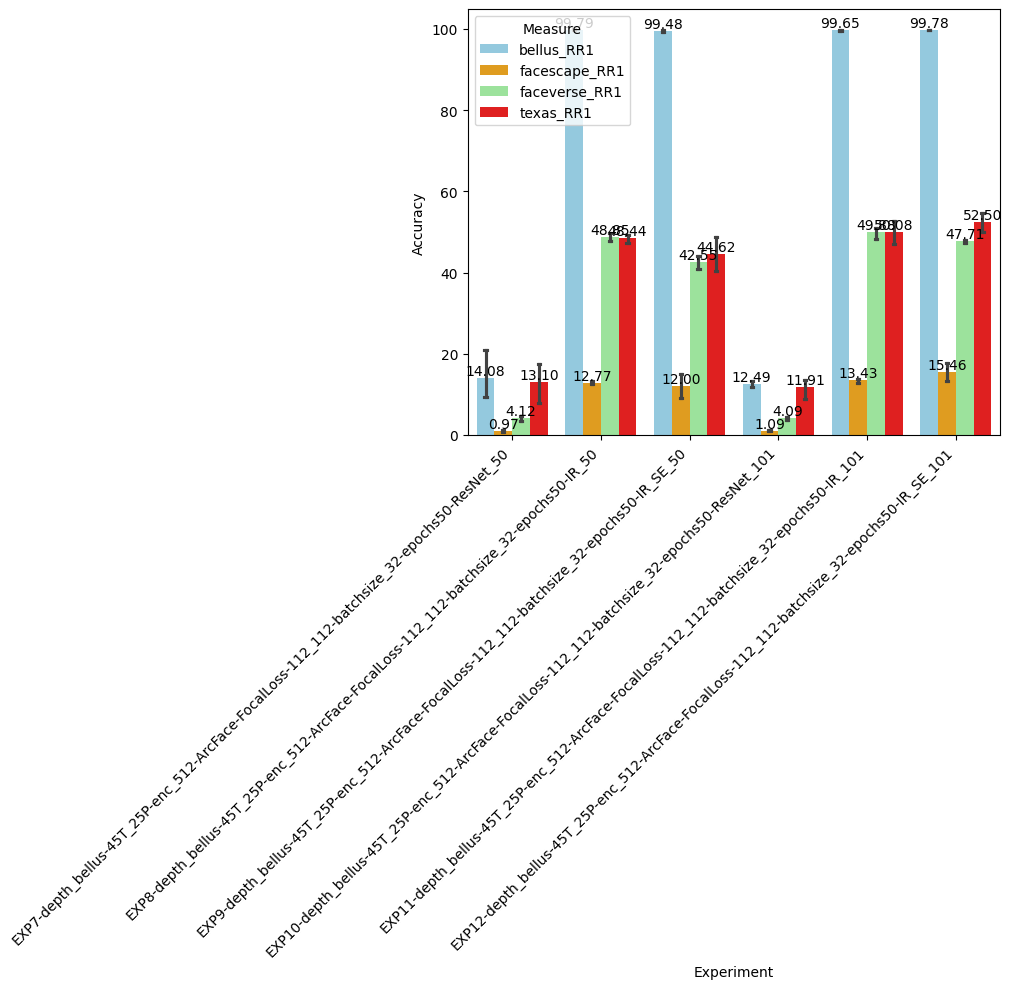

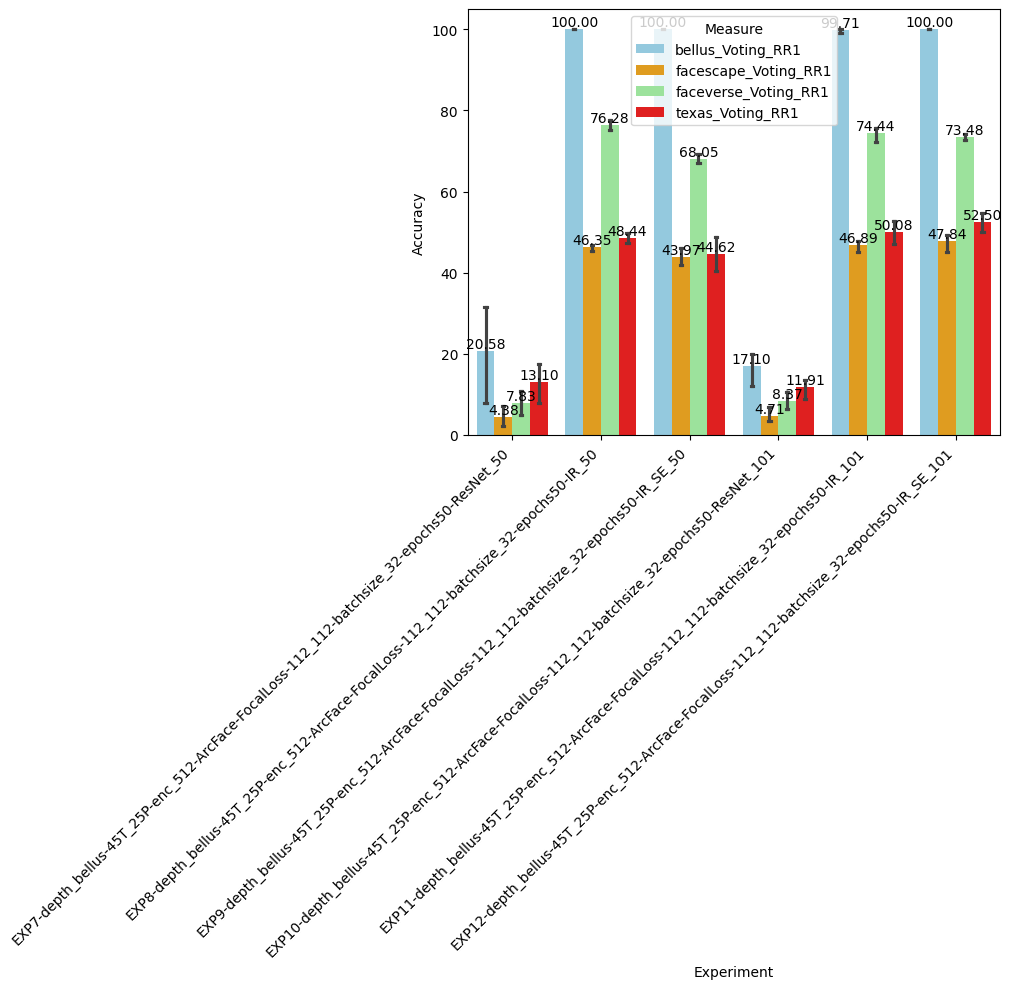

In [16]:
df_selected = select_runs(df_runs, run_configs, ['EXP7-','EXP8-','EXP9-','EXP10-','EXP11-','EXP12-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)
#analyse_embedding(df_selected)

### EXP [13-18] rgbd_bellus-45T_25P-enc_512-ArcFace-FocalLoss-112_112-batchsize_32-epochs50-\<MODEL\>

Selected: 18 ['113129204246726823', '113129204246726823', '113129204246726823', '684526817602124812', '684526817602124812', '684526817602124812', '898263092529228606', '898263092529228606', '898263092529228606', '968146518580656468', '968146518580656468', '968146518580656468', '990636790004825293', '990636790004825293', '990636790004825293', '992720557218550828', '992720557218550828', '992720557218550828']


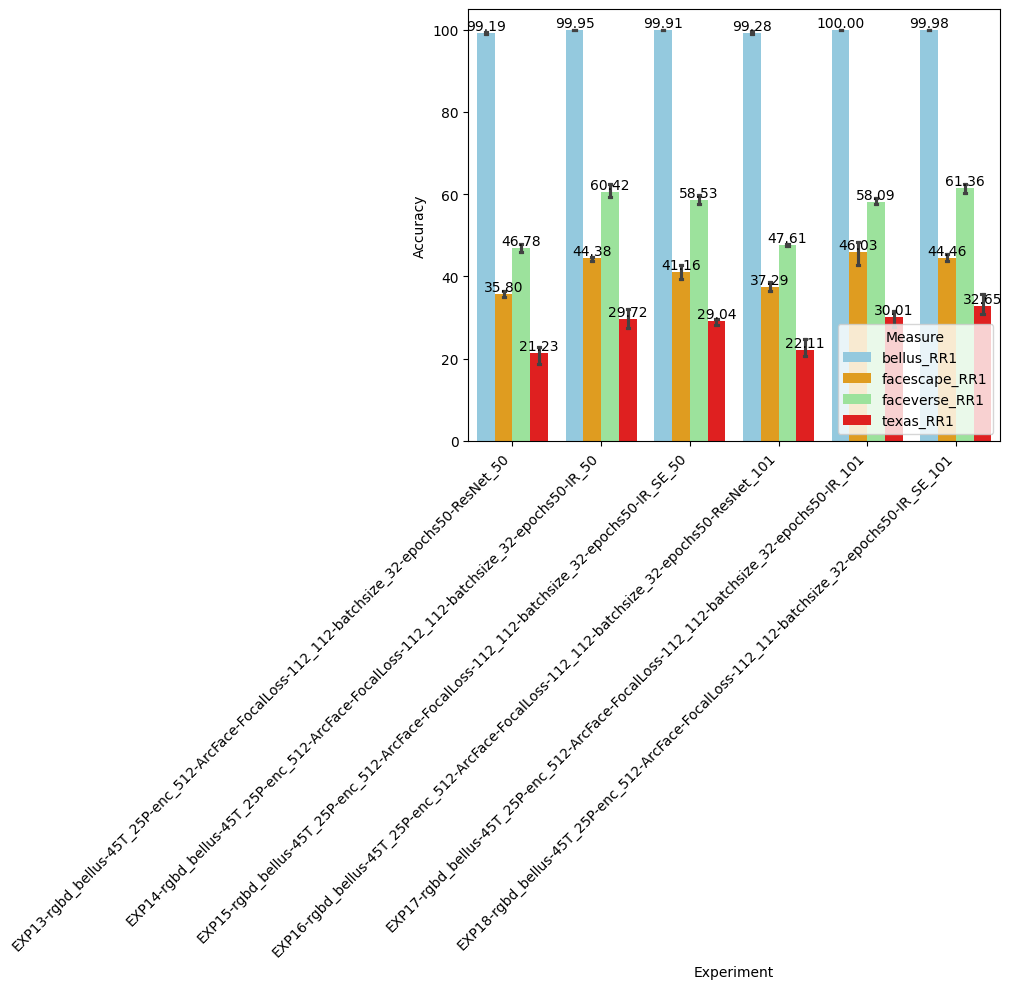

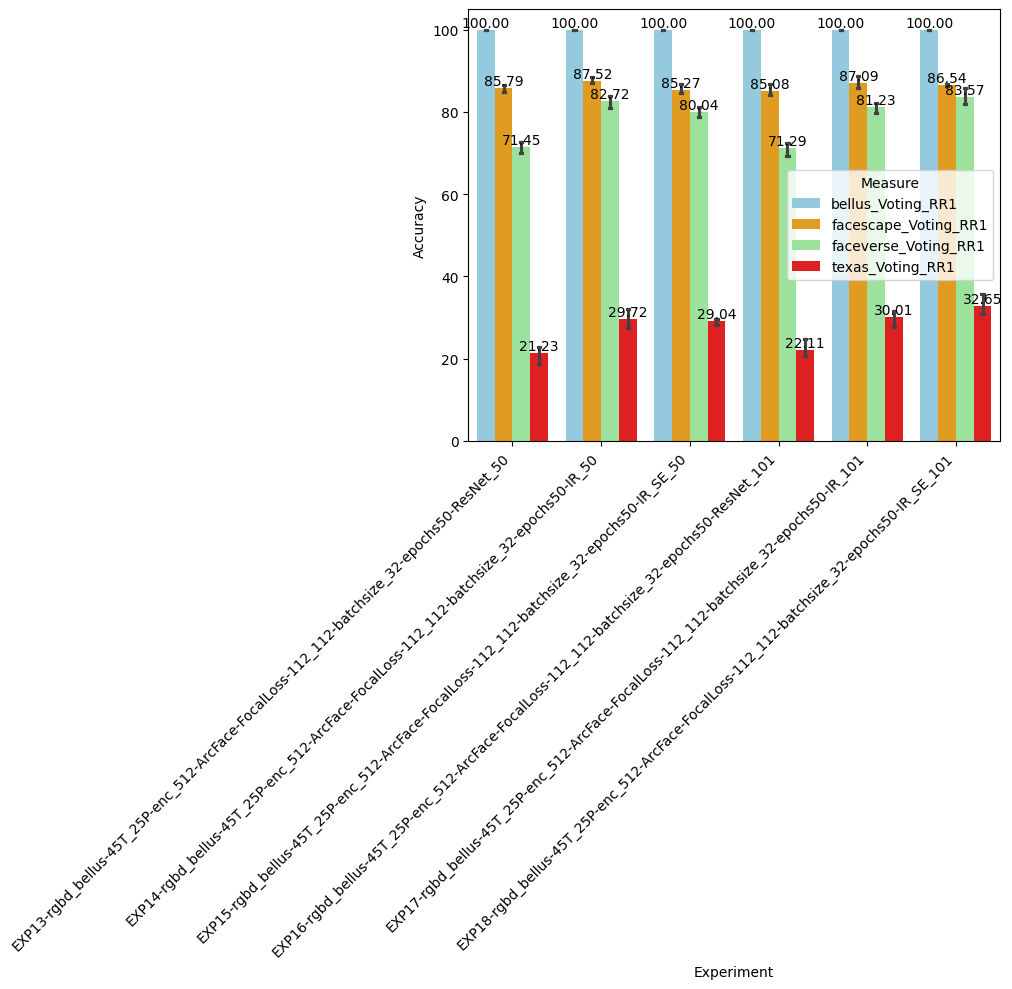

In [17]:
df_selected = select_runs(df_runs, run_configs, ['EXP13-','EXP14-','EXP15-','EXP16-','EXP17-','EXP18-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)
#analyse_embedding(df_selected)

### EXP [19-24] rgbd_bellus-45T_25P-enc_512-ArcFace-FocalLoss-112_112-batchsize_[16/32]-epochs50-\<MODEL\>

Selected: 35 ['113129204246726823', '113129204246726823', '113129204246726823', '198001218989780979', '198001218989780979', '198001218989780979', '326301526227812475', '326301526227812475', '326301526227812475', '449428032172154329', '449428032172154329', '565141924842480235', '565141924842480235', '565141924842480235', '684526817602124812', '684526817602124812', '684526817602124812', '718201582151568174', '718201582151568174', '718201582151568174', '898263092529228606', '898263092529228606', '898263092529228606', '925354295638808217', '925354295638808217', '925354295638808217', '968146518580656468', '968146518580656468', '968146518580656468', '990636790004825293', '990636790004825293', '990636790004825293', '992720557218550828', '992720557218550828', '992720557218550828']


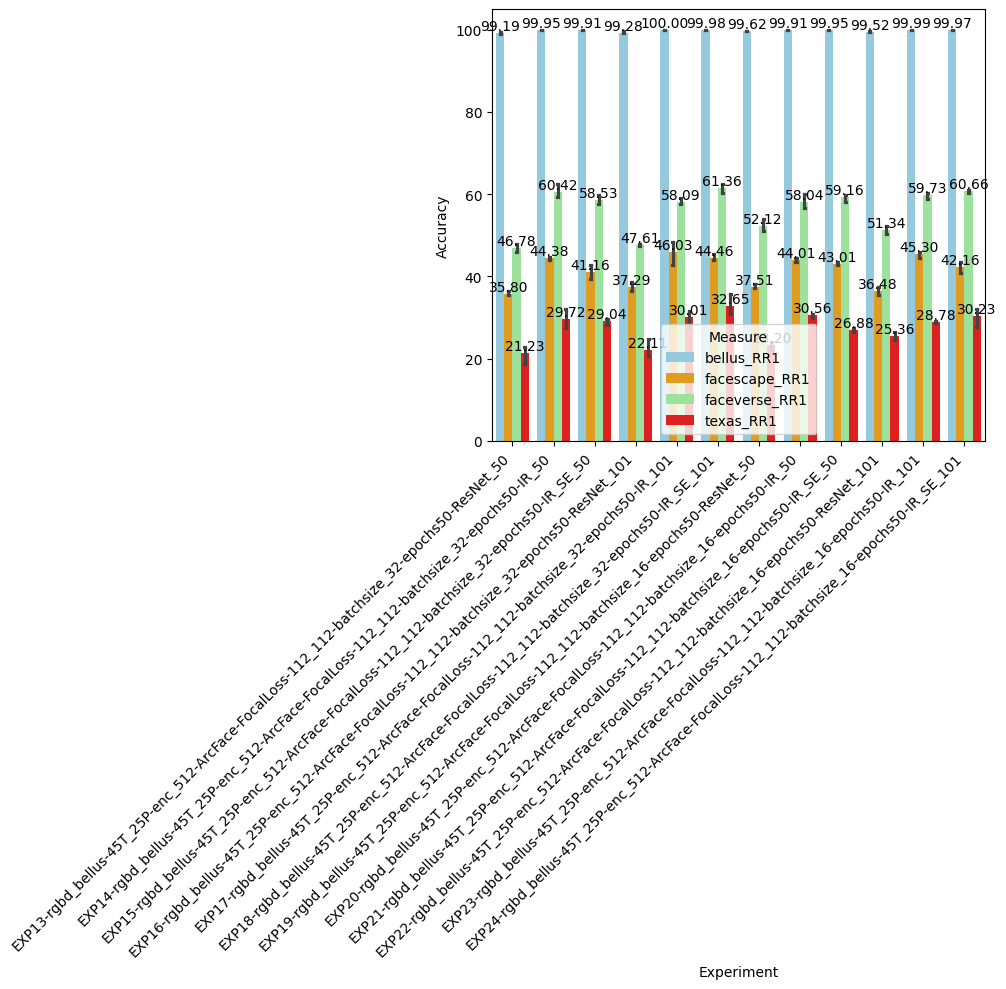

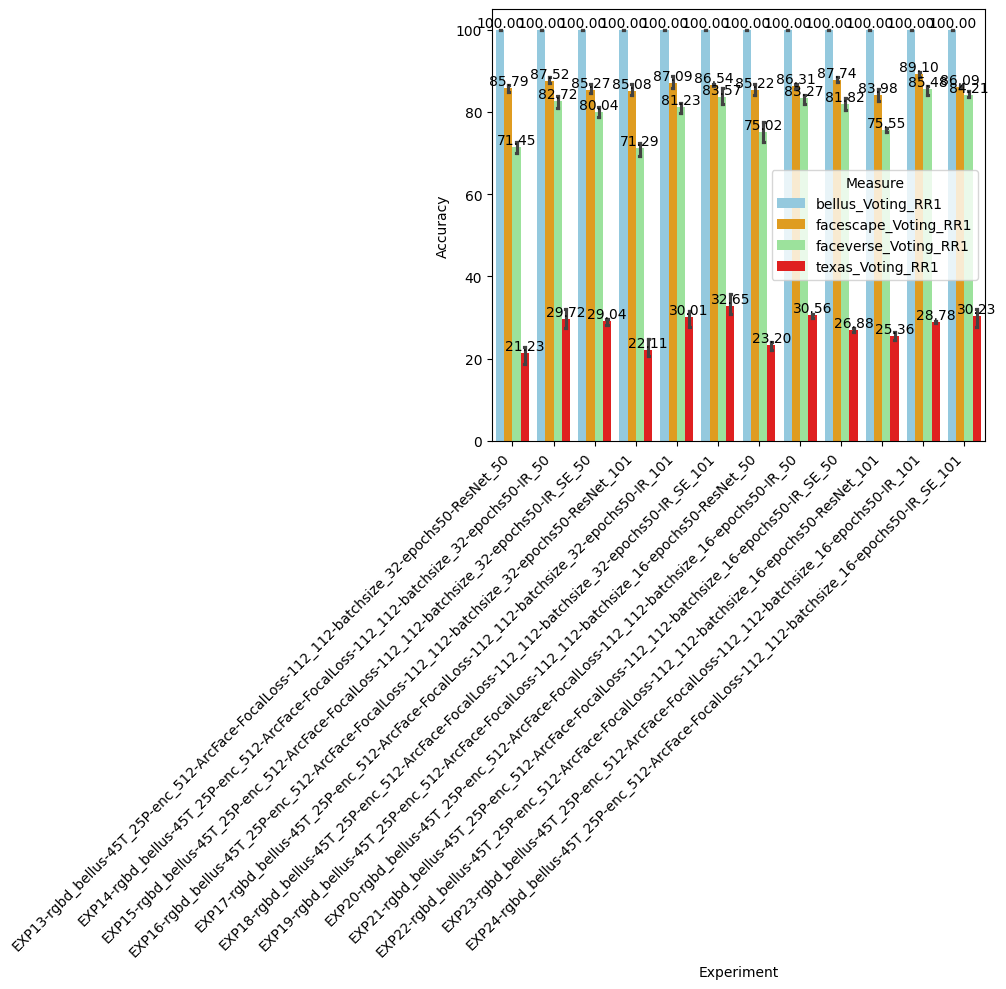

In [18]:
df_selected = select_runs(df_runs, run_configs, ['EXP13-','EXP14-','EXP15-','EXP16-','EXP17-','EXP18-', 'EXP19-','EXP20-','EXP21-','EXP22-','EXP23-','EXP24-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [25-30] rgbd_facescape-500T_25P-enc_512-ArcFace-FocalLoss-112_112-batchsize_16-epochs50-\<MODEL\>

Selected: 10 ['380965190370791752', '380965190370791752', '412072104339477621', '412072104339477621', '412072104339477621', '608991125006381188', '658051556357491206', '670741189408236172', '670741189408236172', '888135547068834241']


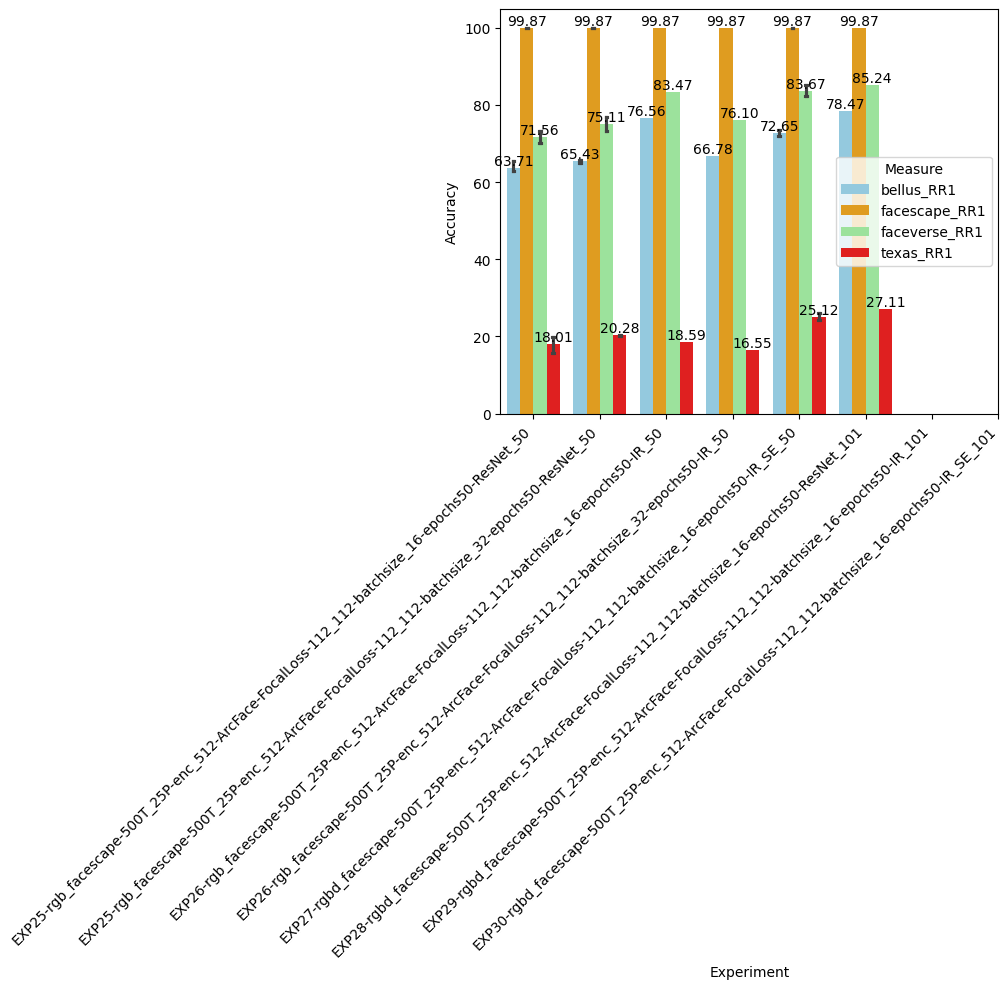

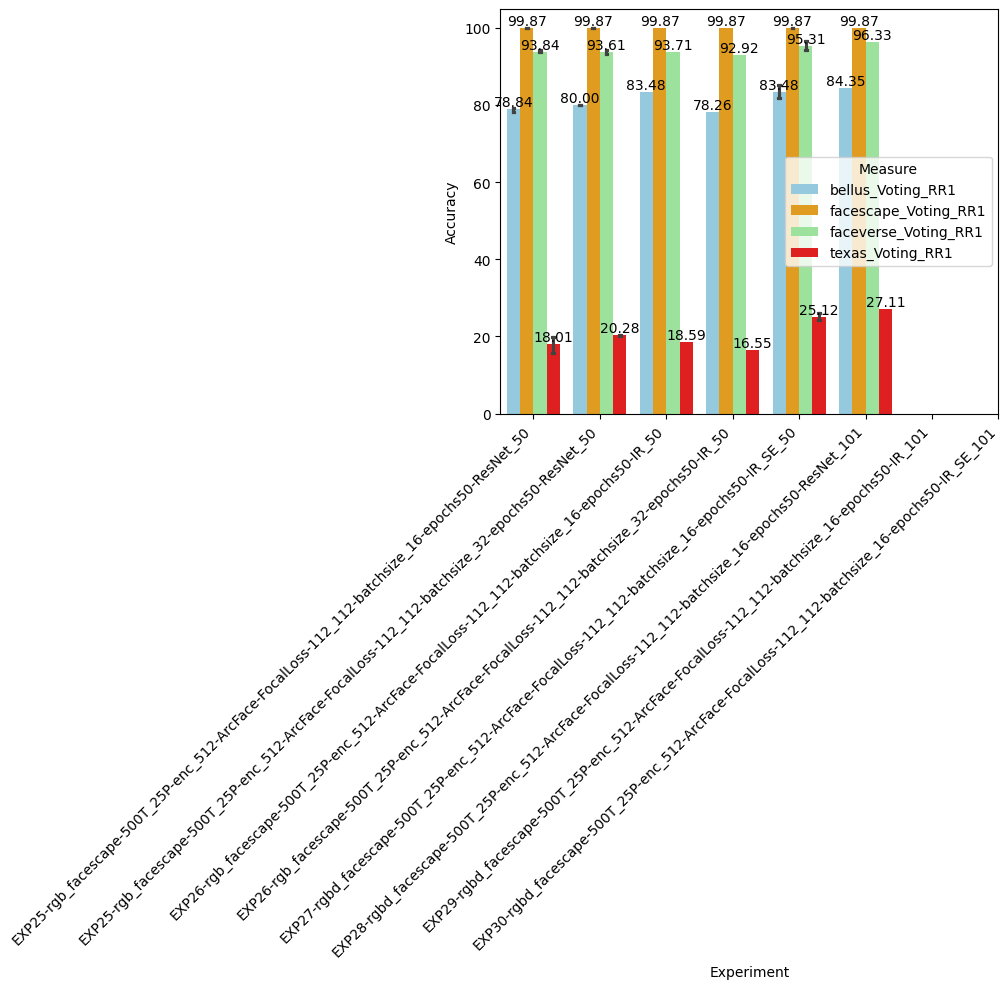

In [19]:
df_selected = select_runs(df_runs, run_configs, ['EXP25-','EXP26-','EXP27-','EXP28-','EXP29-','EXP30-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [31-36] depth_facescape-500T_25P-enc_512-ArcFace-FocalLoss-112_112-batchsize_16-epochs50-\<MODEL\>

Selected: 3 ['221021306140145340', '254565957053446777', '746262022341731760']


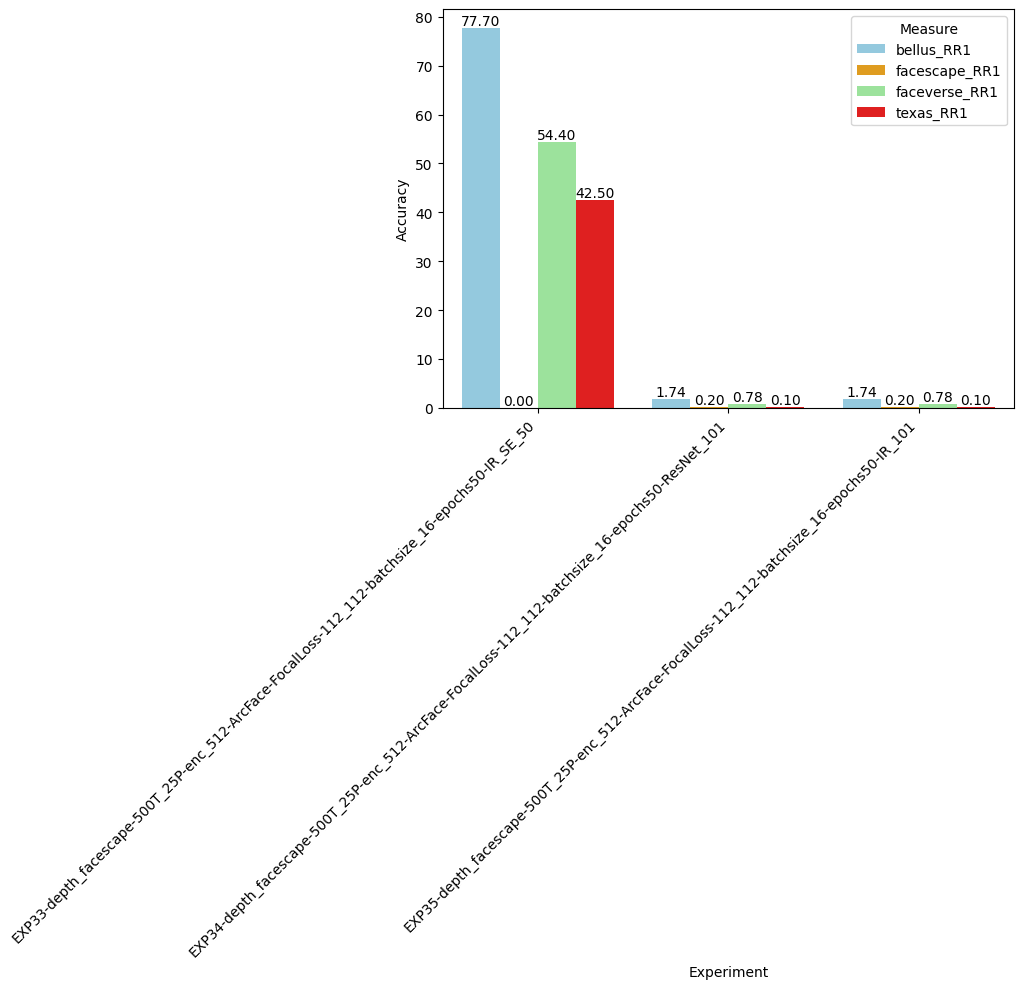

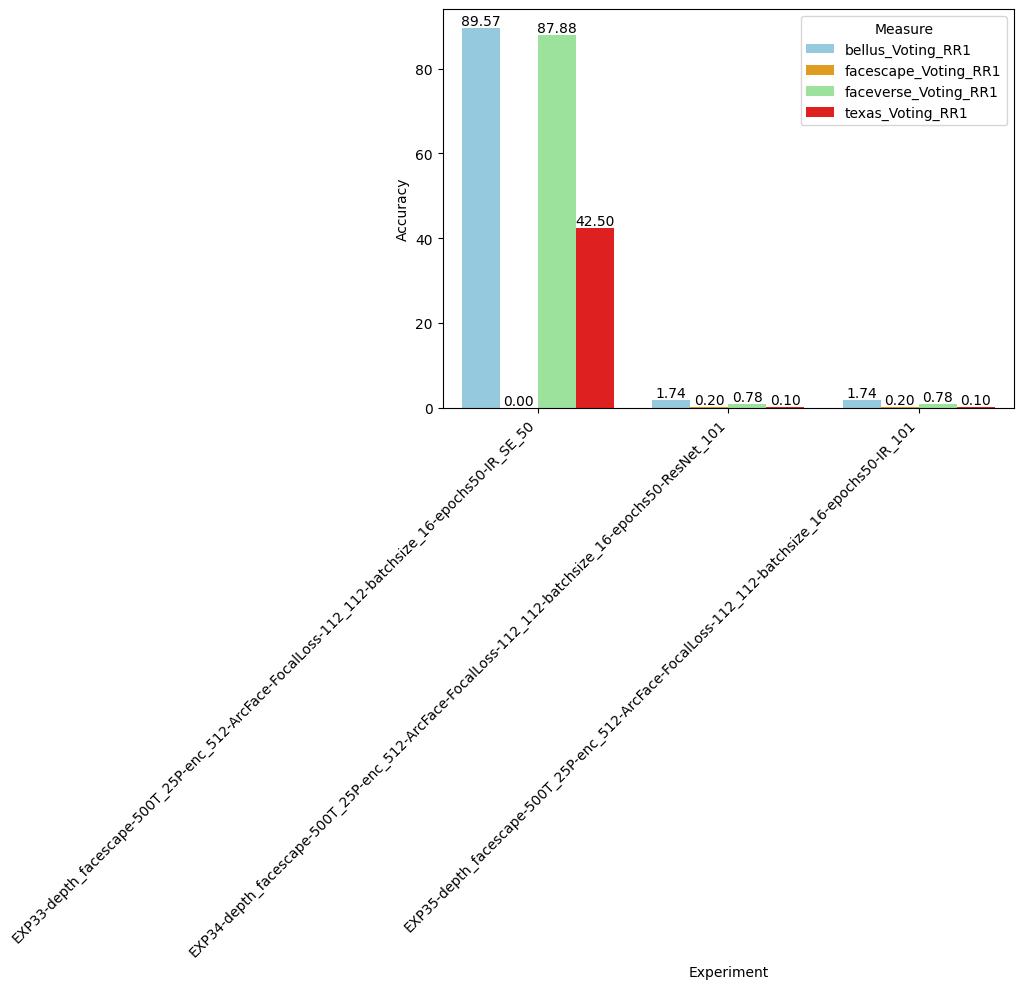

In [20]:
df_selected = select_runs(df_runs, run_configs, ['EXP31-','EXP32-','EXP33-','EXP34-','EXP35-','EXP36-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [37-42] rgb_facescape-500T_25P-enc_512-ArcFace-FocalLoss-112_112-batchsize_16-epochs50-\<MODEL\>

Selected: 6 ['191019159014369042', '291381042239090087', '310766857947861779', '326530012412376213', '728041601083563116', '776406479556832989']


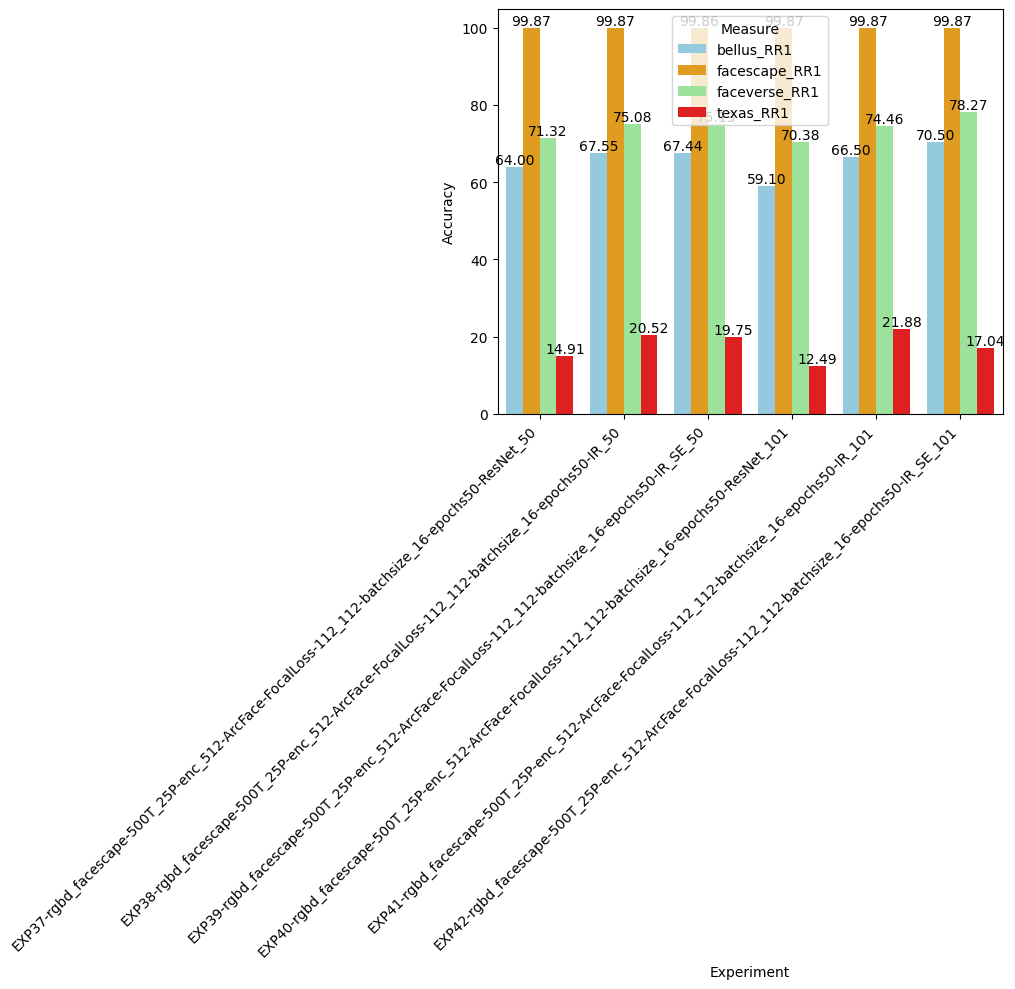

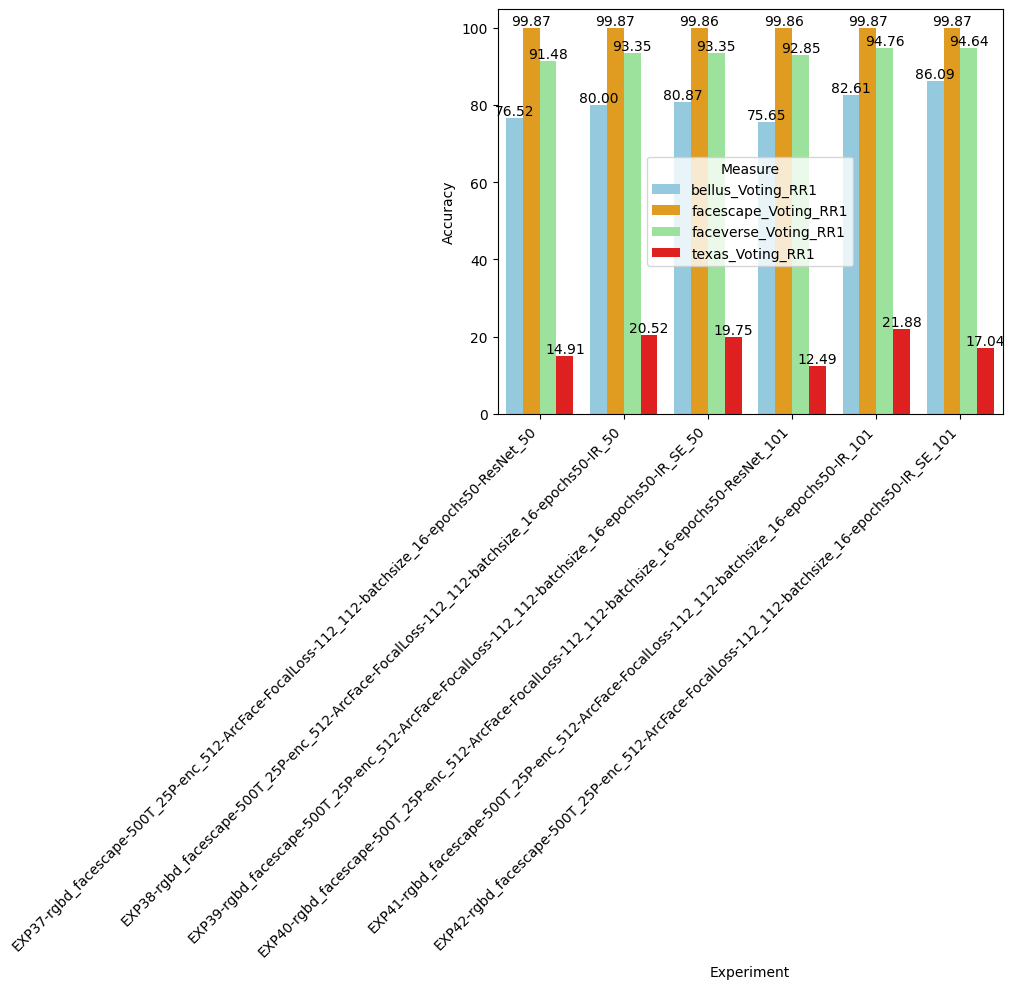

In [21]:
df_selected = select_runs(df_runs, run_configs, ['EXP37-','EXP38-','EXP39-','EXP40-','EXP41-','EXP42-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [43-48] rgbd_bellus-45T_25P-enc_512-ArcFace-FocalLoss-224_244-batchsize_16-epochs50-\<MODEL\>

Selected: 0 []


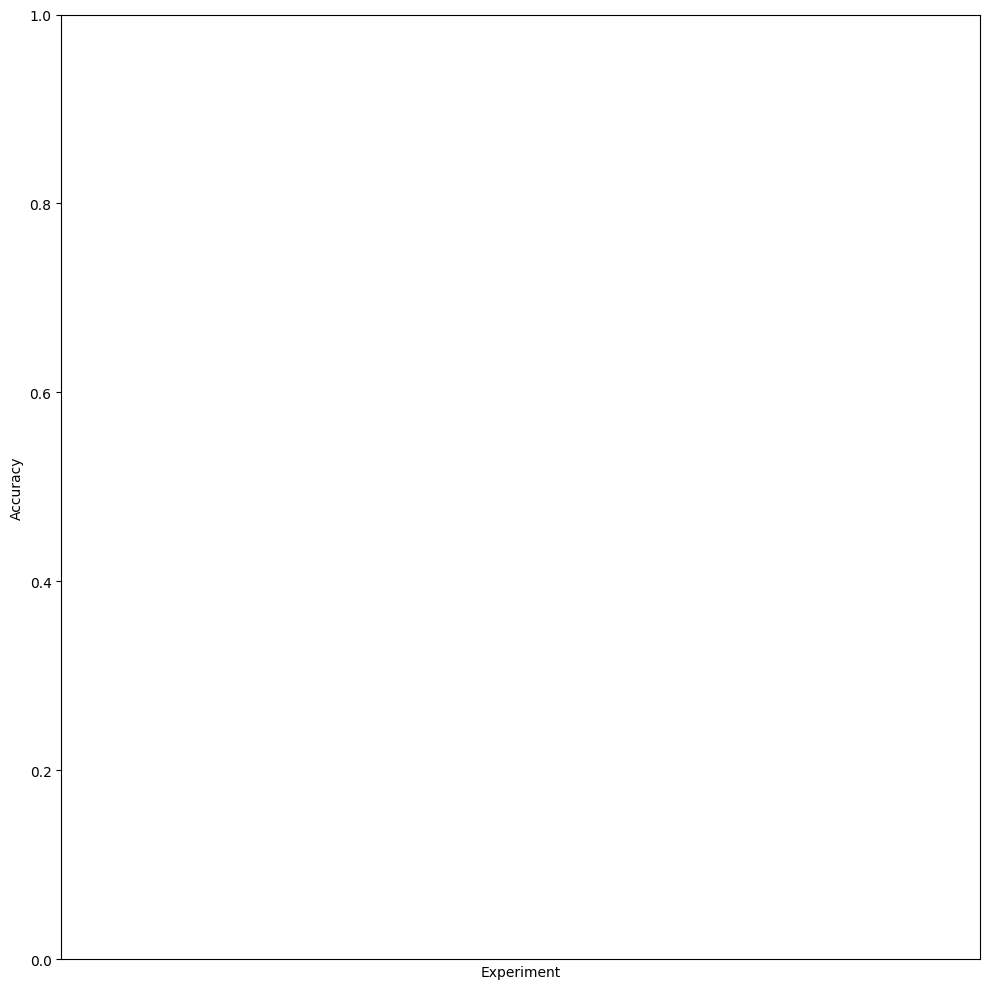

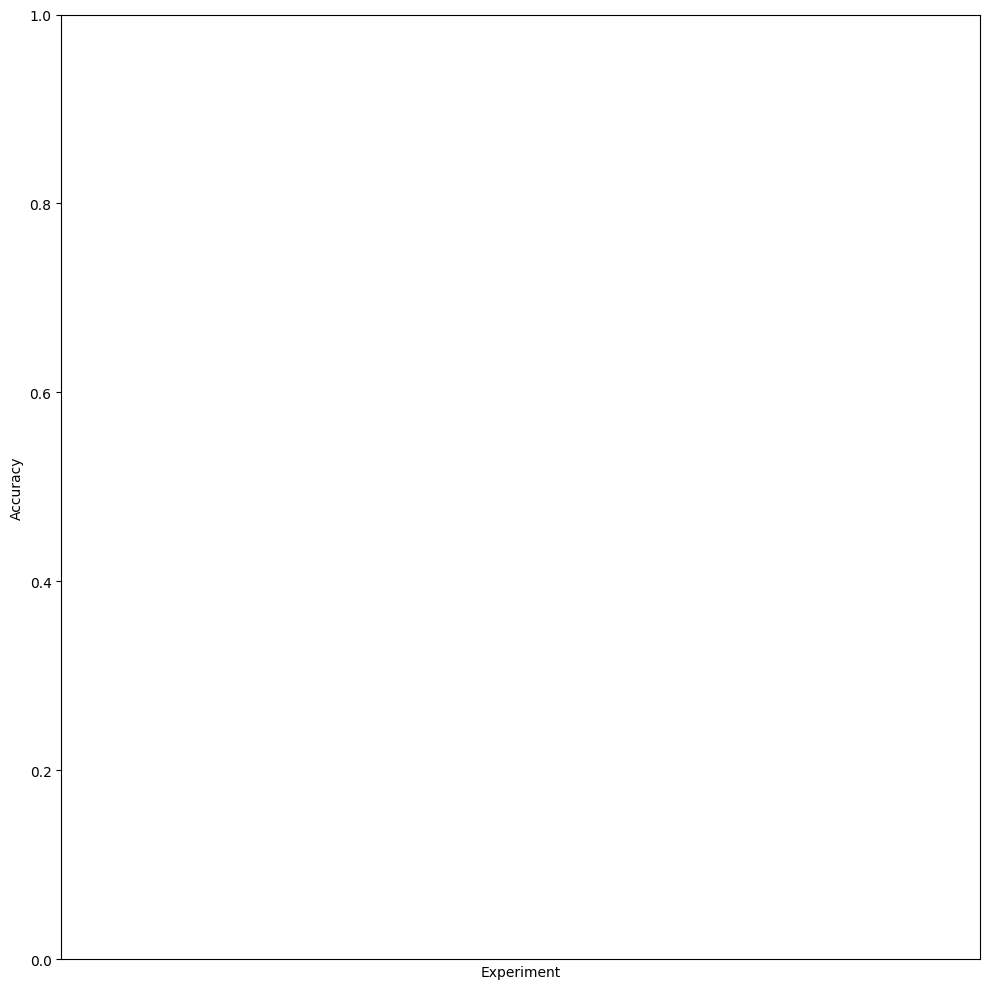

In [20]:
df_selected = select_runs(df_runs, run_configs, ['EXP43-','EXP44-','EXP45-','EXP46-','EXP47-','EXP48-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [49-51] IR-50-Pretrained on MS and AsiaPrivate

Selected: 3 ['166643670449922767', '182152522377854970', '367576227080572980']


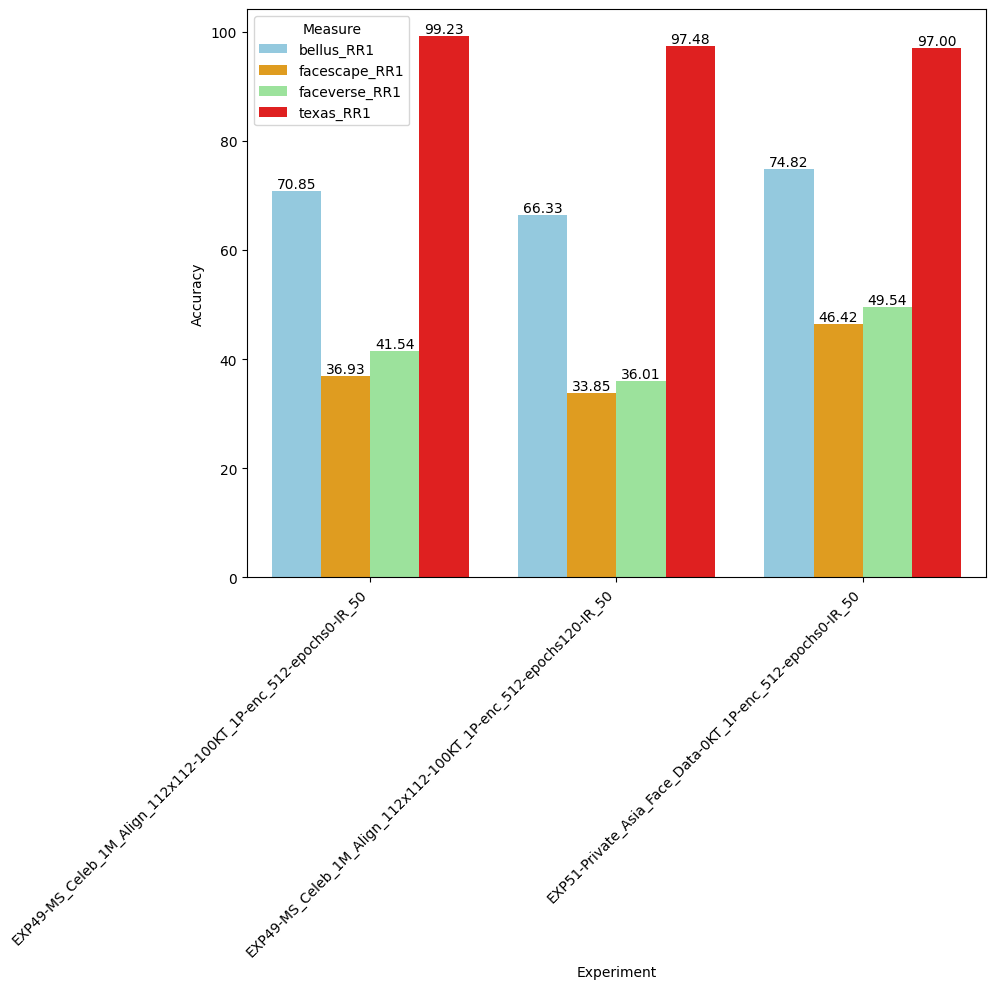

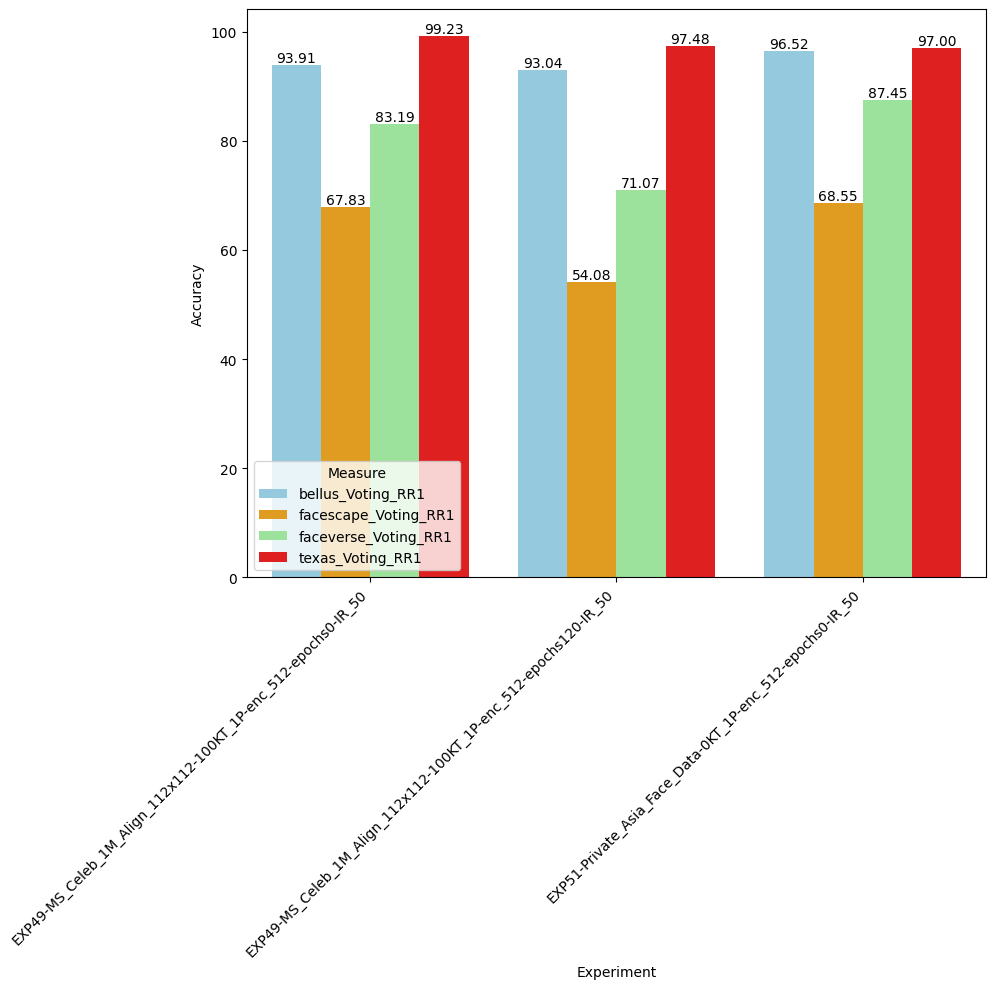

In [23]:
df_selected = select_runs(df_runs, run_configs, ['EXP49-','EXP50-','EXP51-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [54-59] rgbd_bellus-45T_25P-enc_512-ArcFace-FocalLoss-112_112-batchsize_64-epochs50-\<MODEL\>

Selected: 6 ['403606390314949540', '560752569612079448', '809419325299596291', '923224216024903713', '965364235522085669', '979873228473662894']


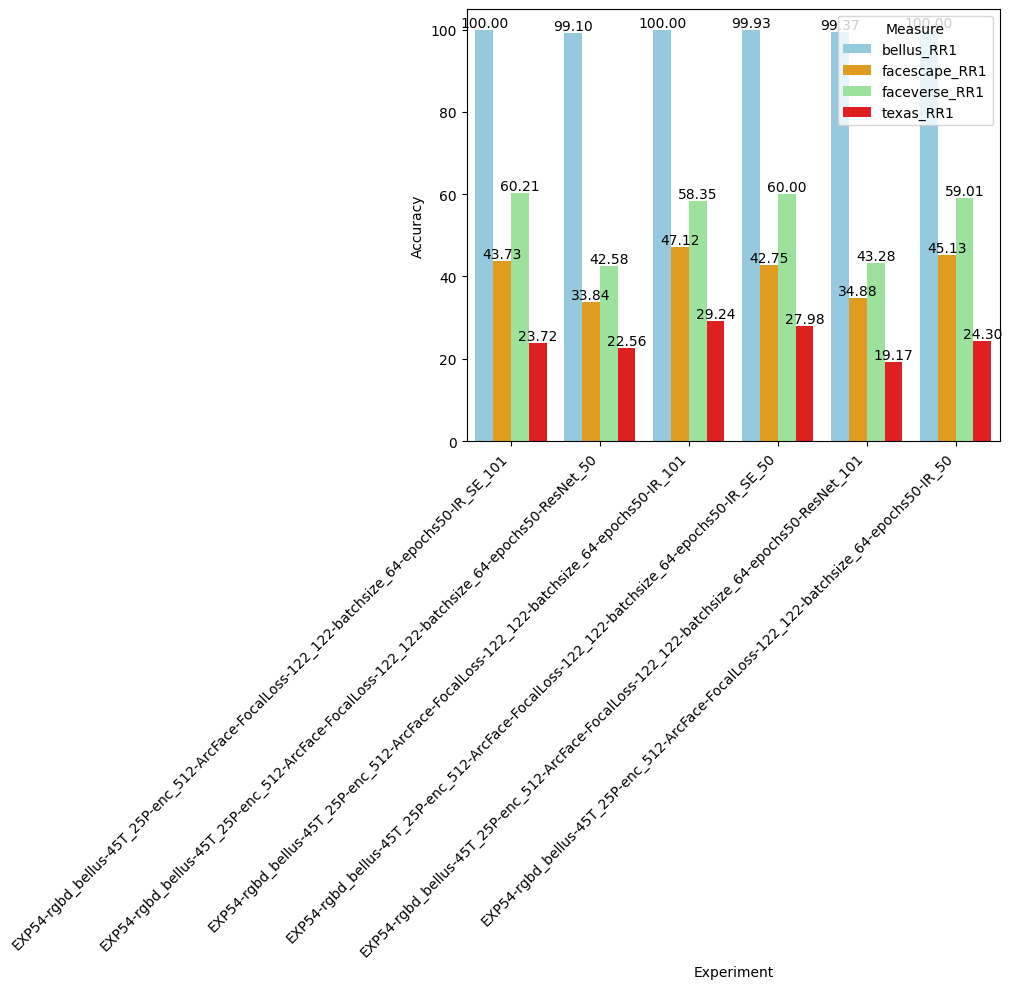

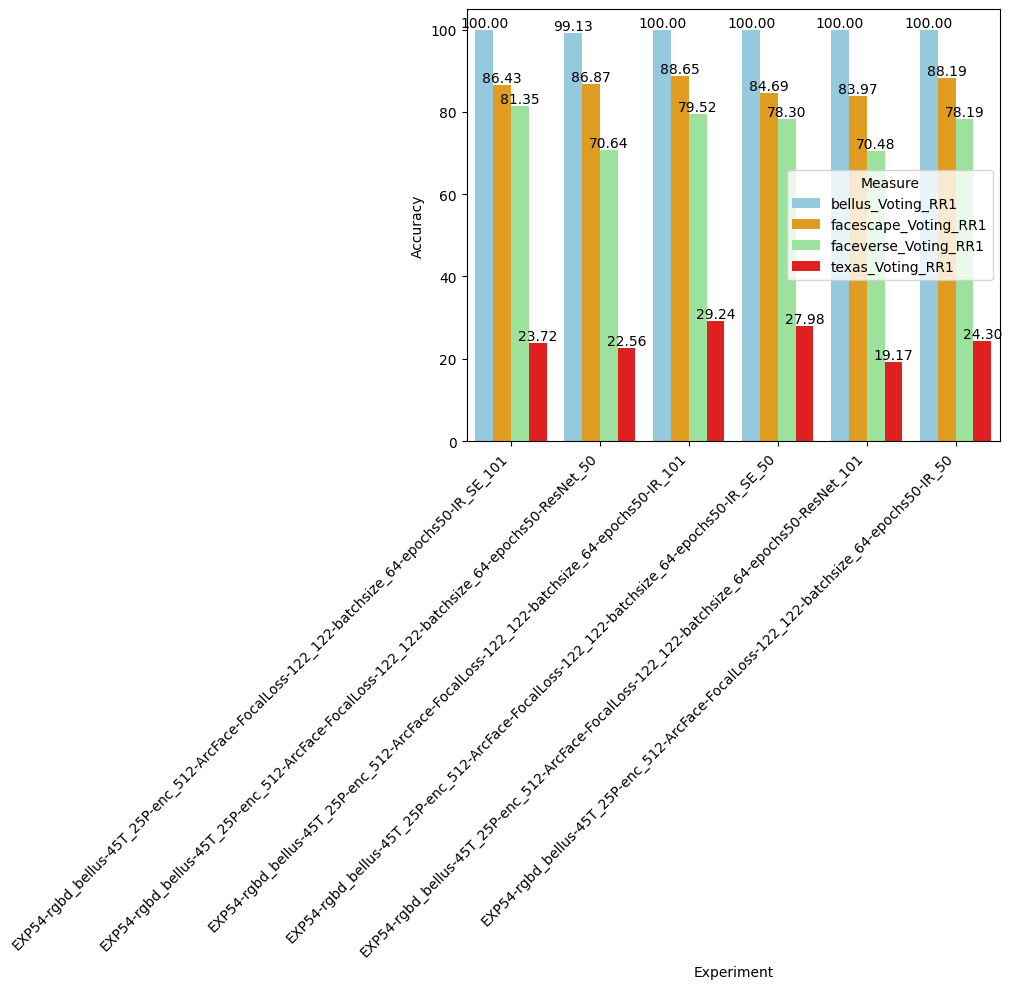

In [29]:
df_selected = select_runs(df_runs, run_configs, ['EXP54-','EXP55-','EXP56-','EXP57-','EXP58-', 'EXP59-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [63-57] IR-50-Pretrained on MS and AsiaPrivate undistorted

Selected: 8 ['266575400434222983', '322148123534409772', '325978011602923062', '325978011602923062', '325978011602923062', '499229568889230827', '618050588810869860', '962789338795676195']


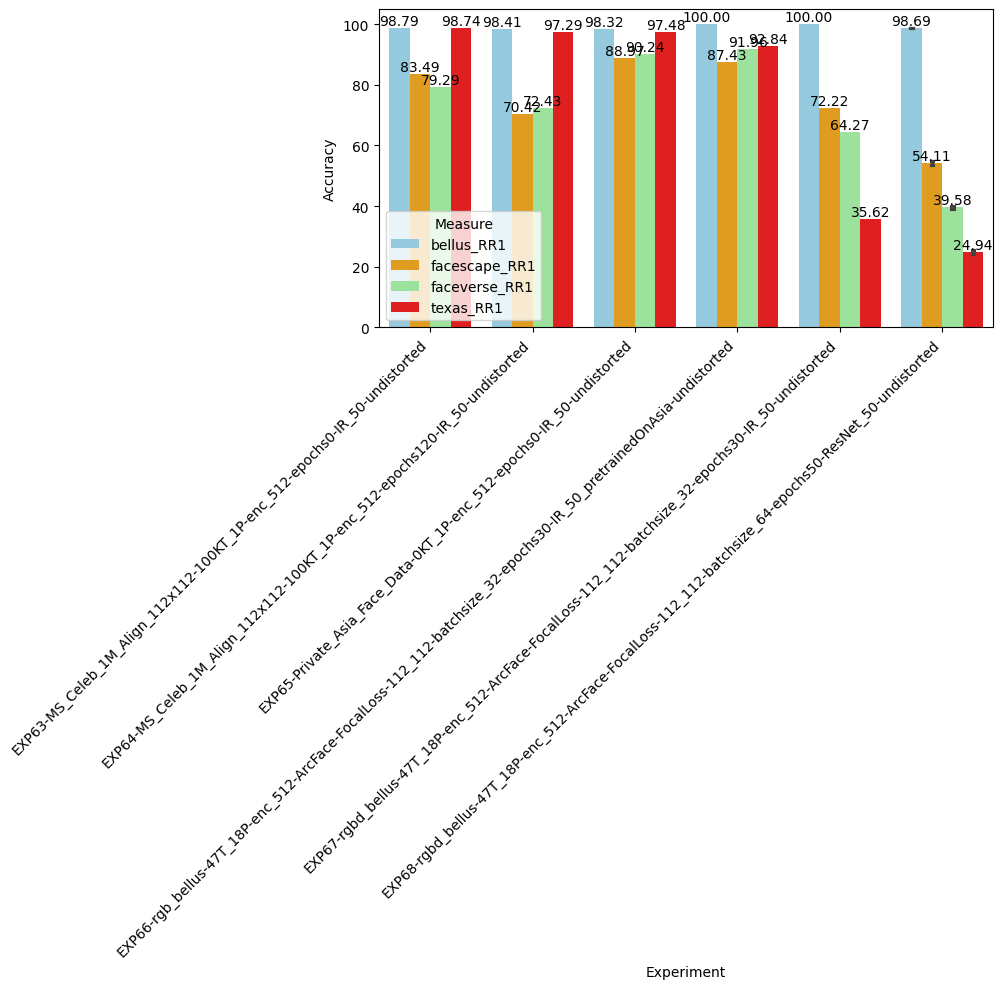

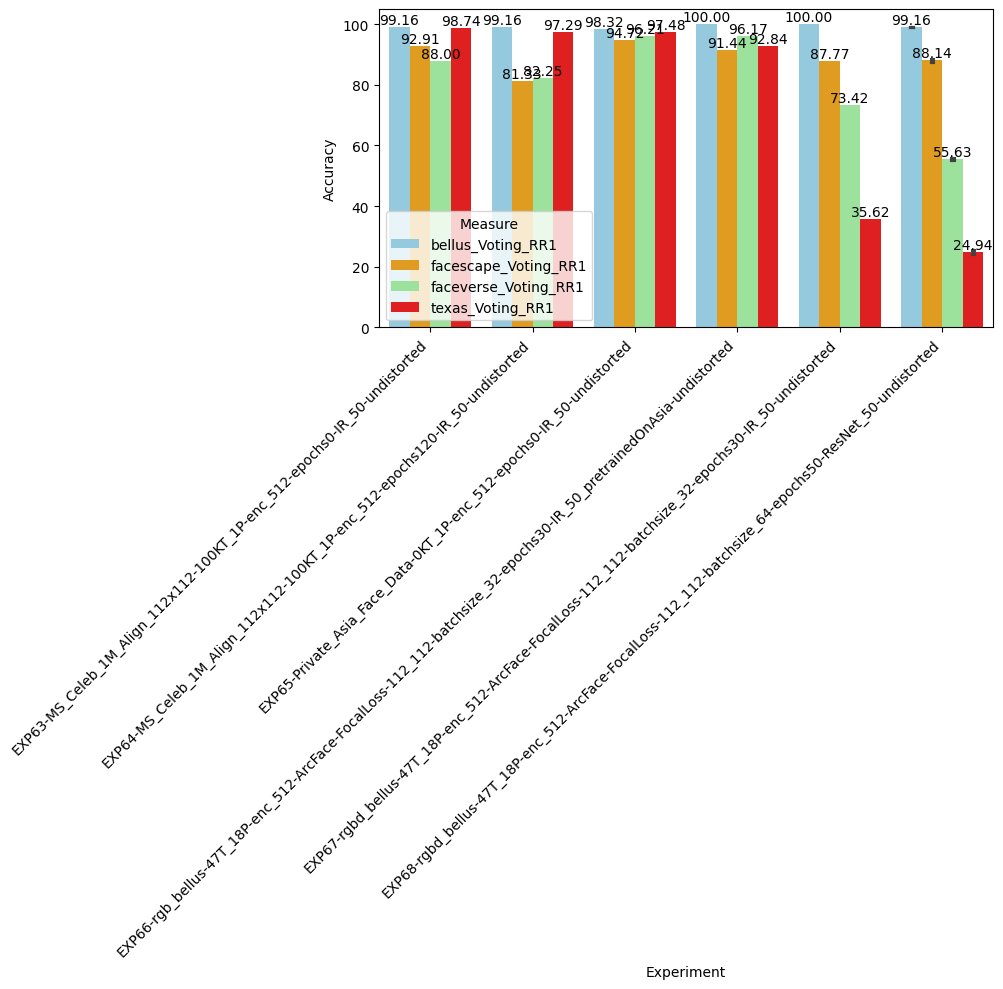

In [25]:
df_selected = select_runs(df_runs, run_configs, ['EXP63-','EXP64-','EXP65-','EXP66-','EXP67-', 'EXP68-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [68-79] rgbd_bellus-47T_18P-enc_512-ArcFace-FocalLoss-112_112-batchsize_\<64-128\>-epochs50-\<MODEL\>-undistored

Selected: 17 ['281103519597288200', '281103519597288200', '281103519597288200', '307141597483709347', '307141597483709347', '307141597483709347', '325978011602923062', '325978011602923062', '325978011602923062', '727389981403576407', '727389981403576407', '820543159121493007', '866632454380967756', '915686142985997258', '927749406521887388', '959777342908963461', '968007903589141954']


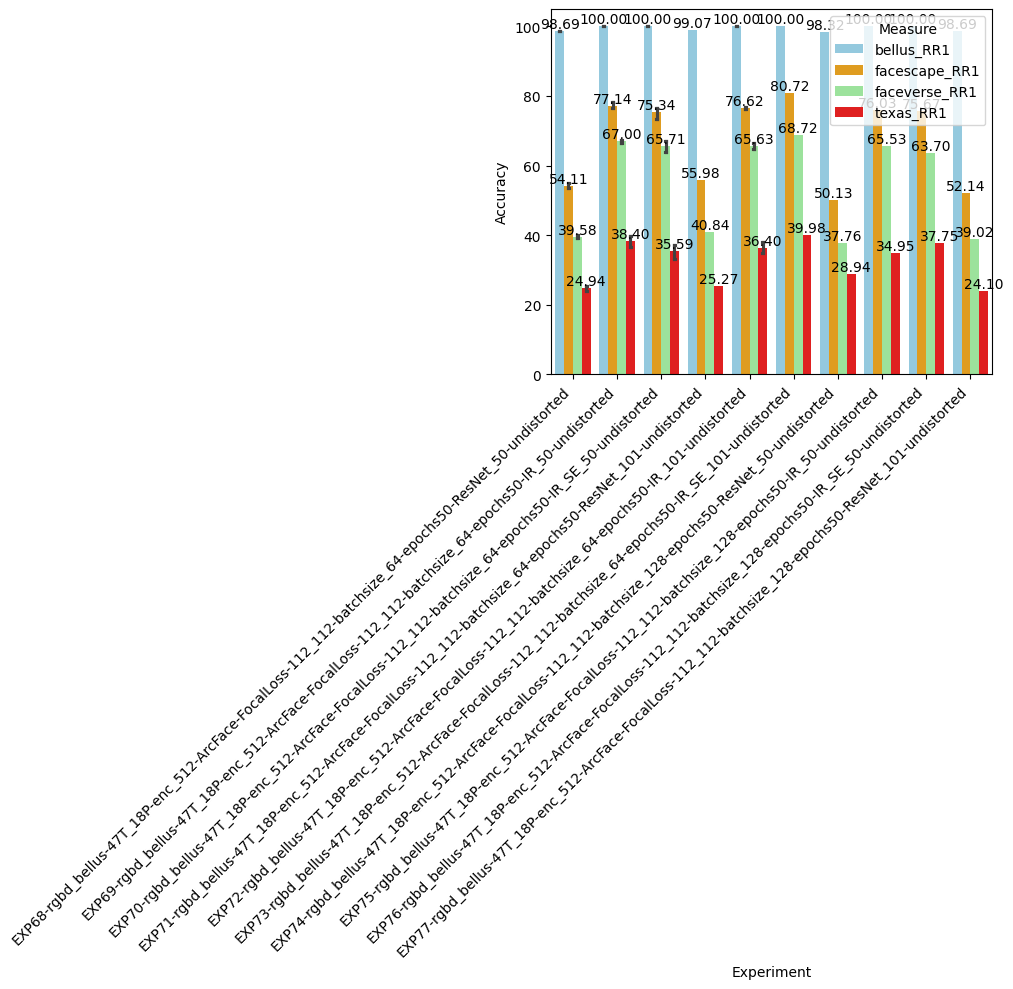

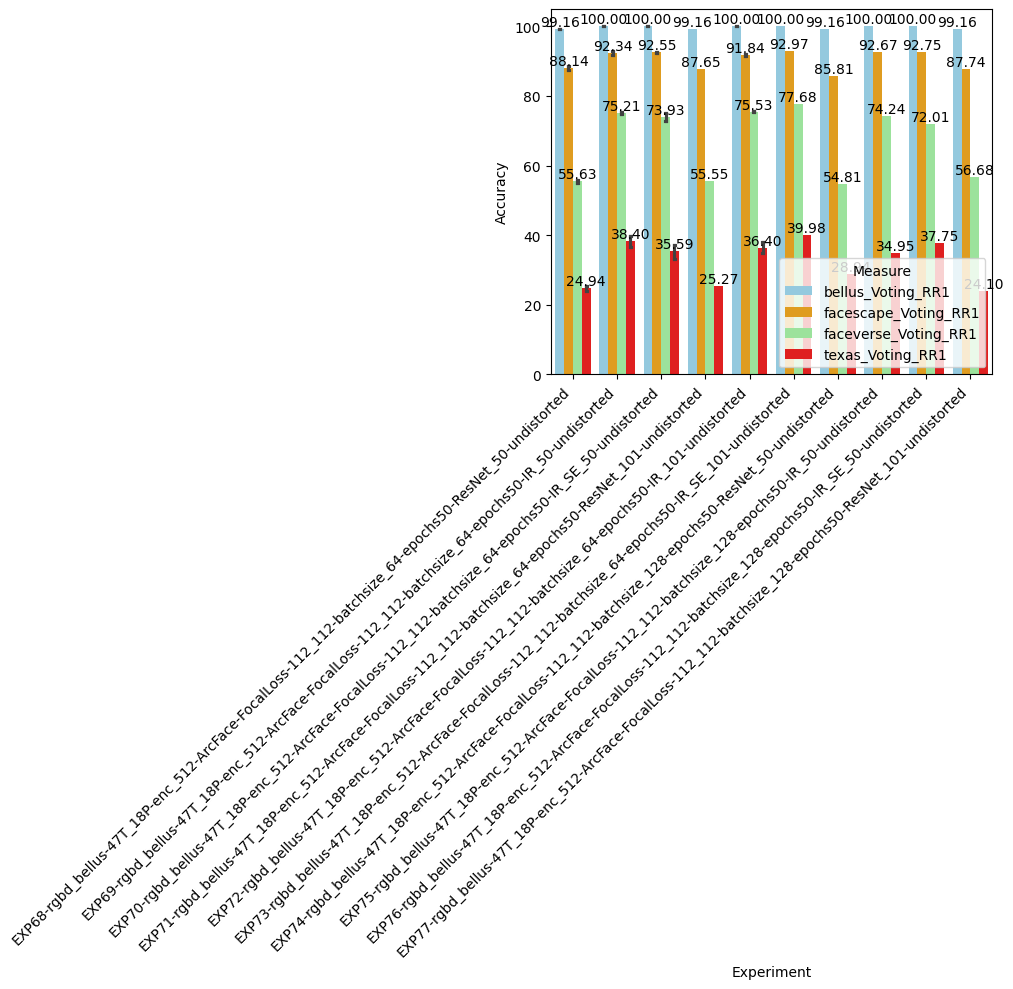

In [26]:
df_selected = select_runs(df_runs, run_configs, ['EXP68-','EXP69-','EXP70-','EXP71-','EXP72-','EXP73-','EXP74-','EXP75-','EXP76-','EXP77-','EXP78-','EXP79-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [80-91] rgbd_facescape-500T_18P-enc_512-ArcFace-FocalLoss-112_112-batchsize_\<64-128\>-epochs50-\<MODEL\>

Selected: 10 ['185702516354196711', '396886846650893300', '402761233898315468', '468163769301028247', '481893616629065103', '559801836351447107', '674007253664014996', '820603248422378959', '974592429531935907', '982988743730154599']


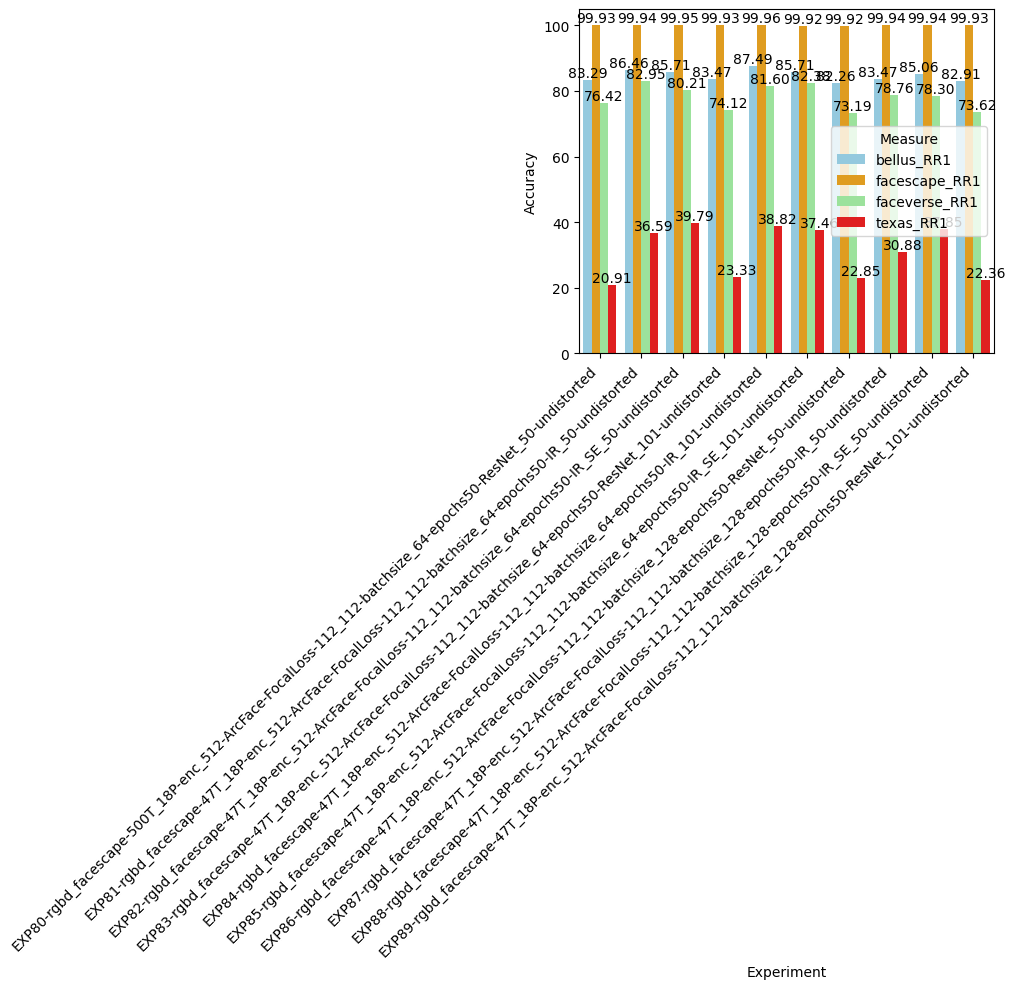

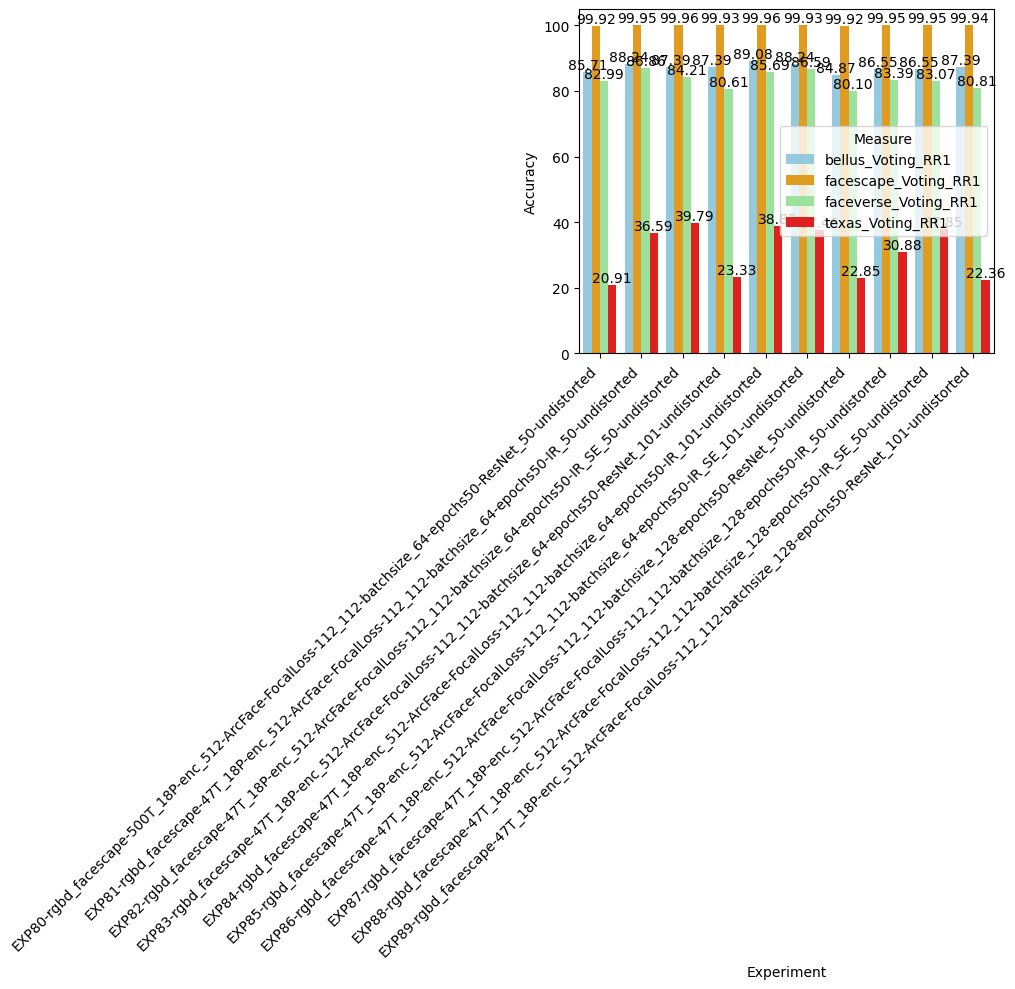

In [27]:
df_selected = select_runs(df_runs, run_configs, ['EXP80-','EXP81-','EXP82-','EXP83-','EXP84-','EXP85-','EXP86-','EXP87-','EXP88-','EXP89-','EXP90-','EXP91-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [92-97] rgbd_bellus-47T_18P-enc_512-ArcFace-Softmax-112_112-batchsize_32-epochs50-\<MODEL\>

Selected: 15 ['459229338744775301', '459229338744775301', '459229338744775301', '559137542276808990', '559137542276808990', '559137542276808990', '667973476969906141', '667973476969906141', '667973476969906141', '667973476969906141', '667973476969906141', '667973476969906141', '694344490665473176', '694344490665473176', '694344490665473176']


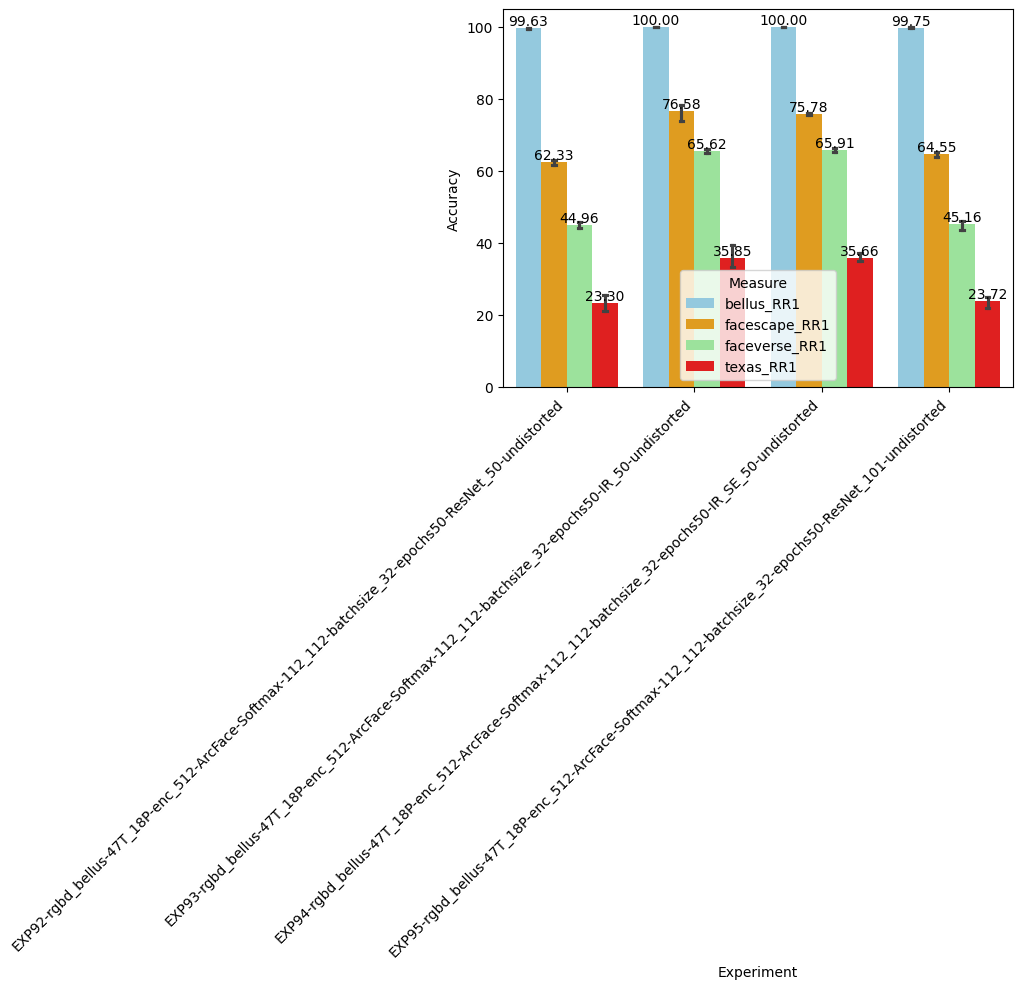

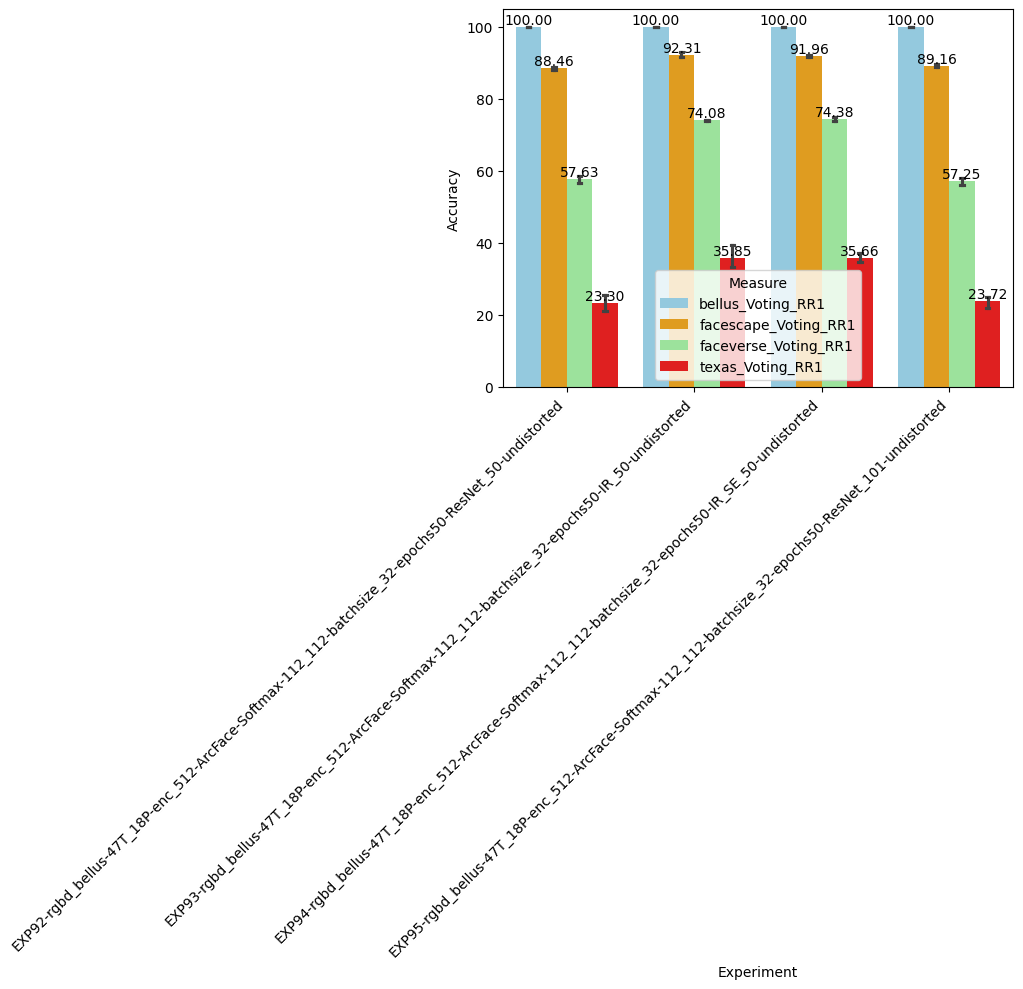

In [28]:
df_selected = select_runs(df_runs, run_configs, ['EXP92-','EXP93-','EXP94-','EXP95-','EXP96-','EXP97-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [98-102] IR-50-Pretrained on MS and AsiaPrivate undistorted

Selected: 10 ['345513842048149774', '613800305909019040', '799534553467965446', '838556559081507261', '838556559081507261', '838556559081507261', '959635273981550305', '959635273981550305', '959635273981550305', '959635273981550305']


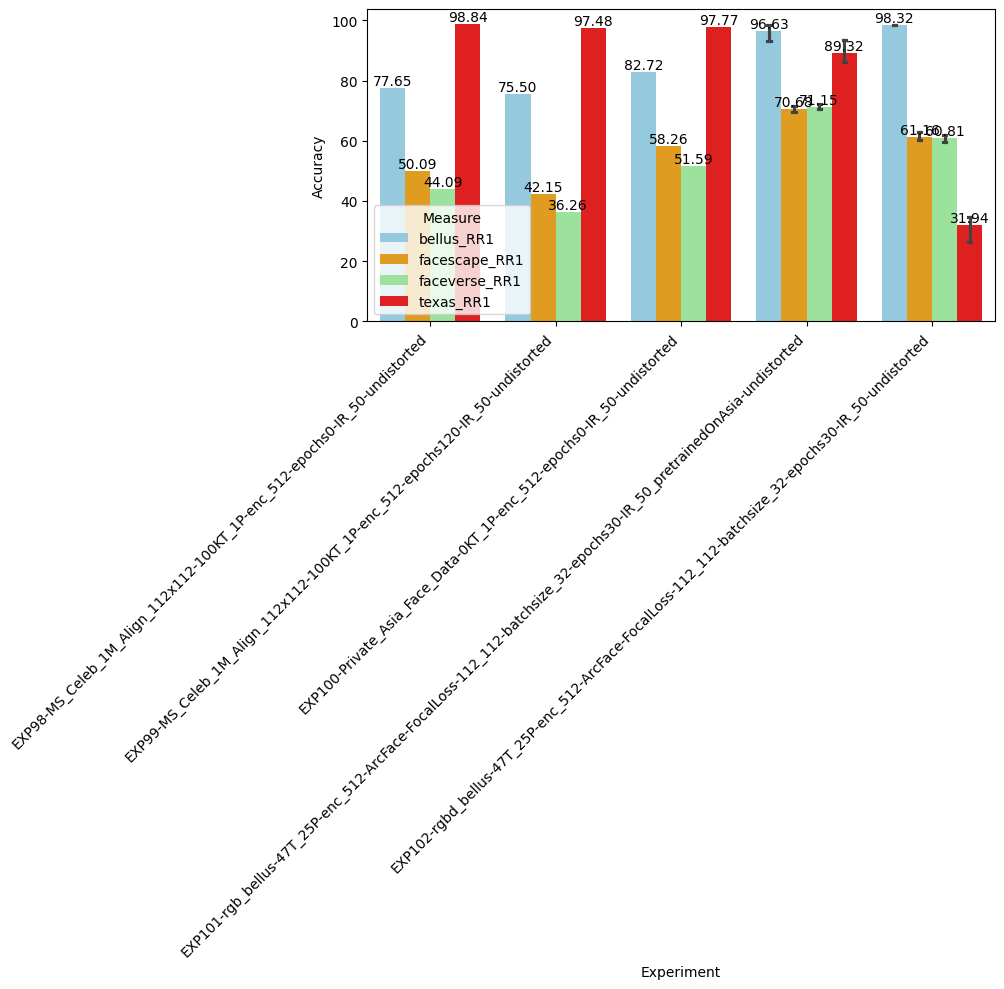

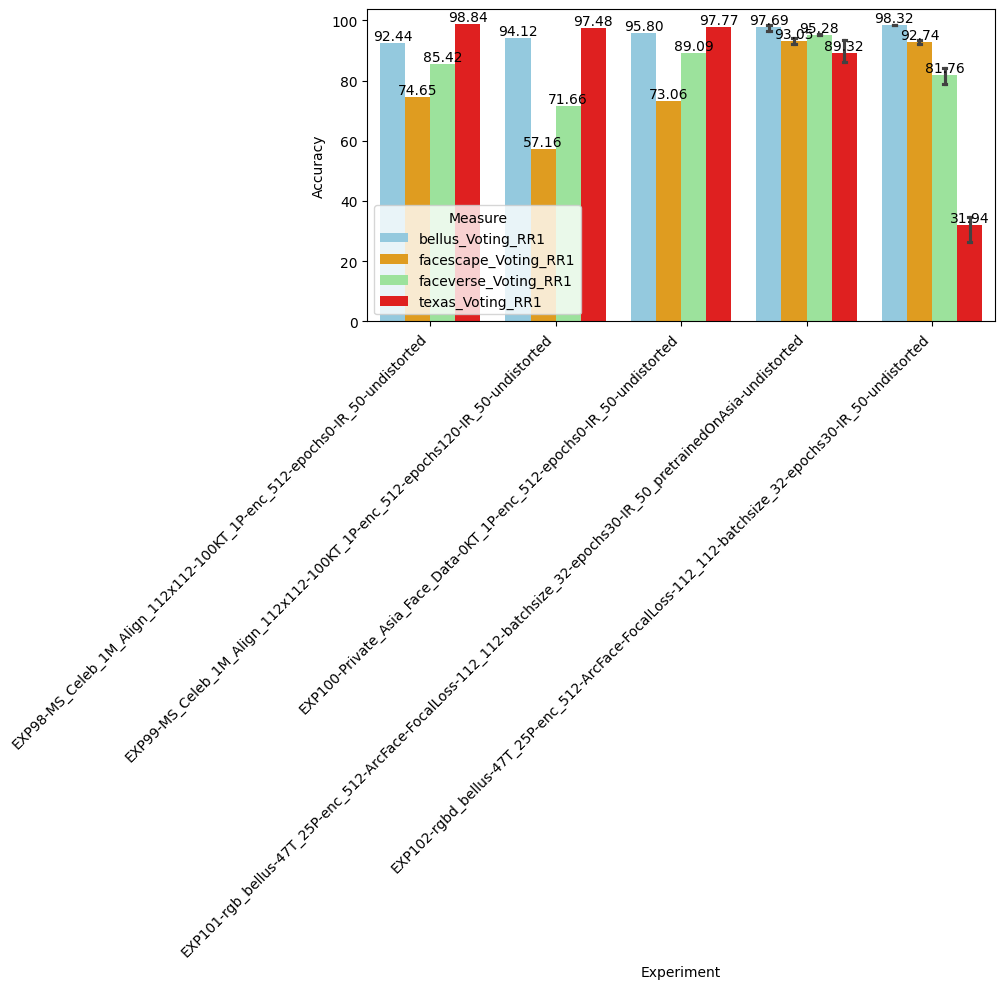

In [29]:
df_selected = select_runs(df_runs, run_configs, ['EXP98-','EXP99-','EXP100-','EXP101-','EXP102-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [103-108] rgbd_bellus-47T_25P-enc_512-ArcFace-FocalLoss-112_112-batchsize_64-epochs50-\<MODEL\>-undistored

Selected: 15 ['151200187947060709', '221025528899696745', '221025528899696745', '221025528899696745', '371879459315946466', '371879459315946466', '371879459315946466', '862796972591887133', '862796972591887133', '862796972591887133', '873117376202587585', '873117376202587585', '873117376202587585', '993599159149121347', '993599159149121347']


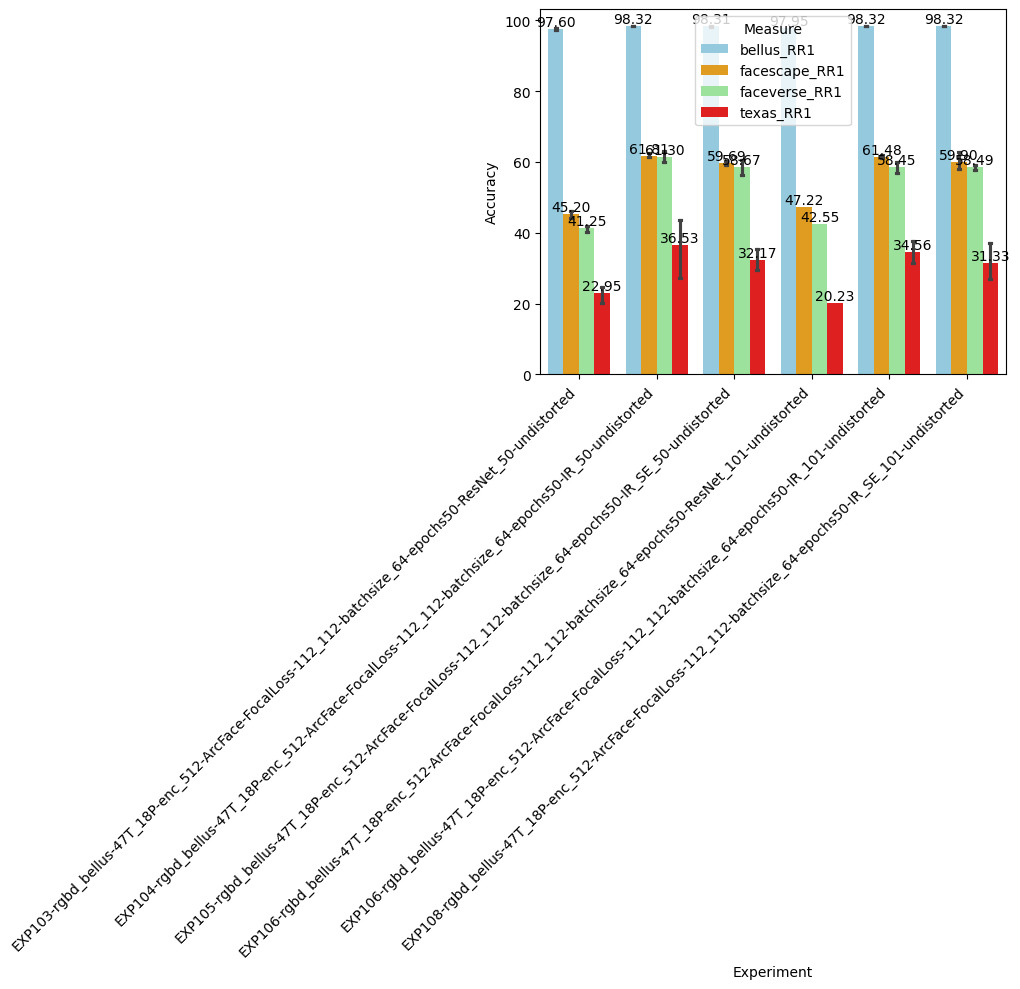

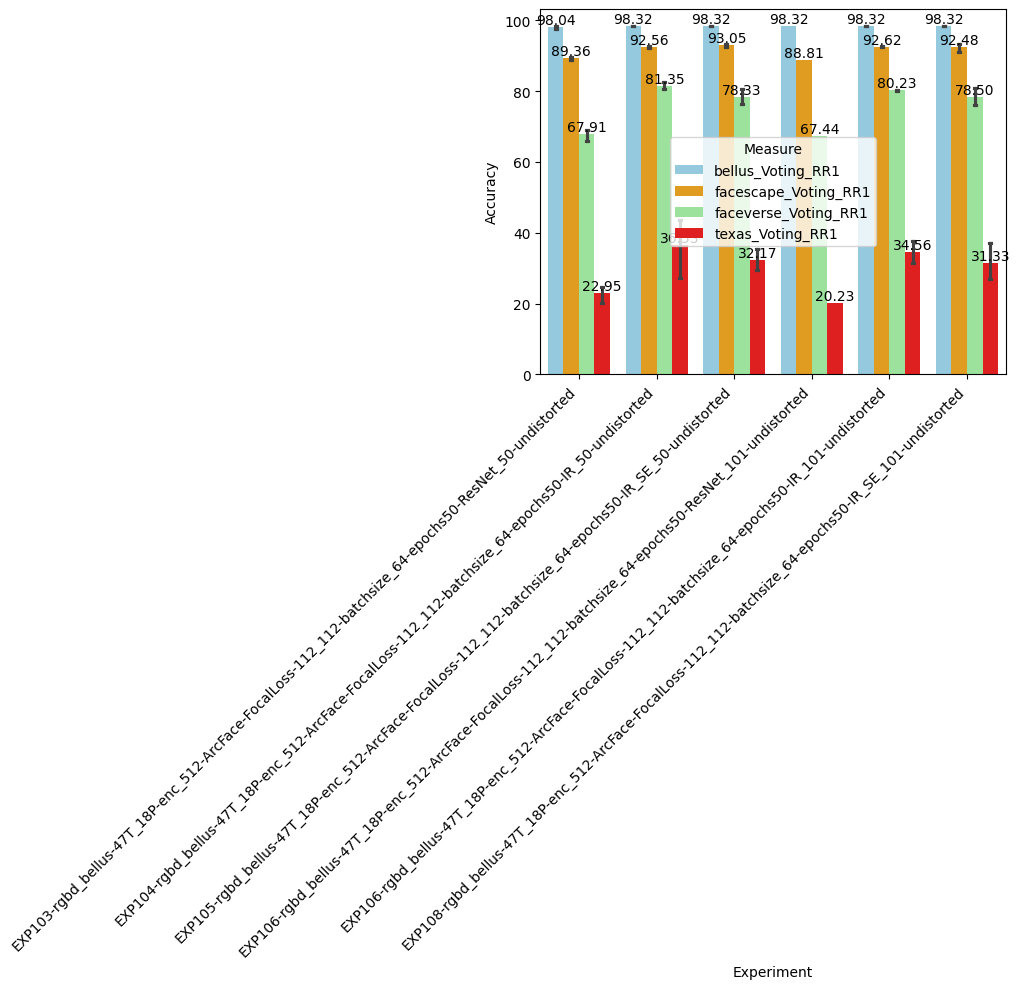

In [38]:
df_selected = select_runs(df_runs, run_configs, ['EXP103-','EXP104-','EXP105-','EXP106-','EXP107-','EXP108-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [109-114] rgbd_facescape-500T_25P-enc_512-ArcFace-FocalLoss-112_112-batchsize_64-epochs50-\<MODEL\>-undistored

Selected: 12 ['113036838634980117', '113036838634980117', '113036838634980117', '261231856719921423', '261231856719921423', '261231856719921423', '669357620708418267', '669357620708418267', '669357620708418267', '835169790375351776', '835169790375351776', '835169790375351776']


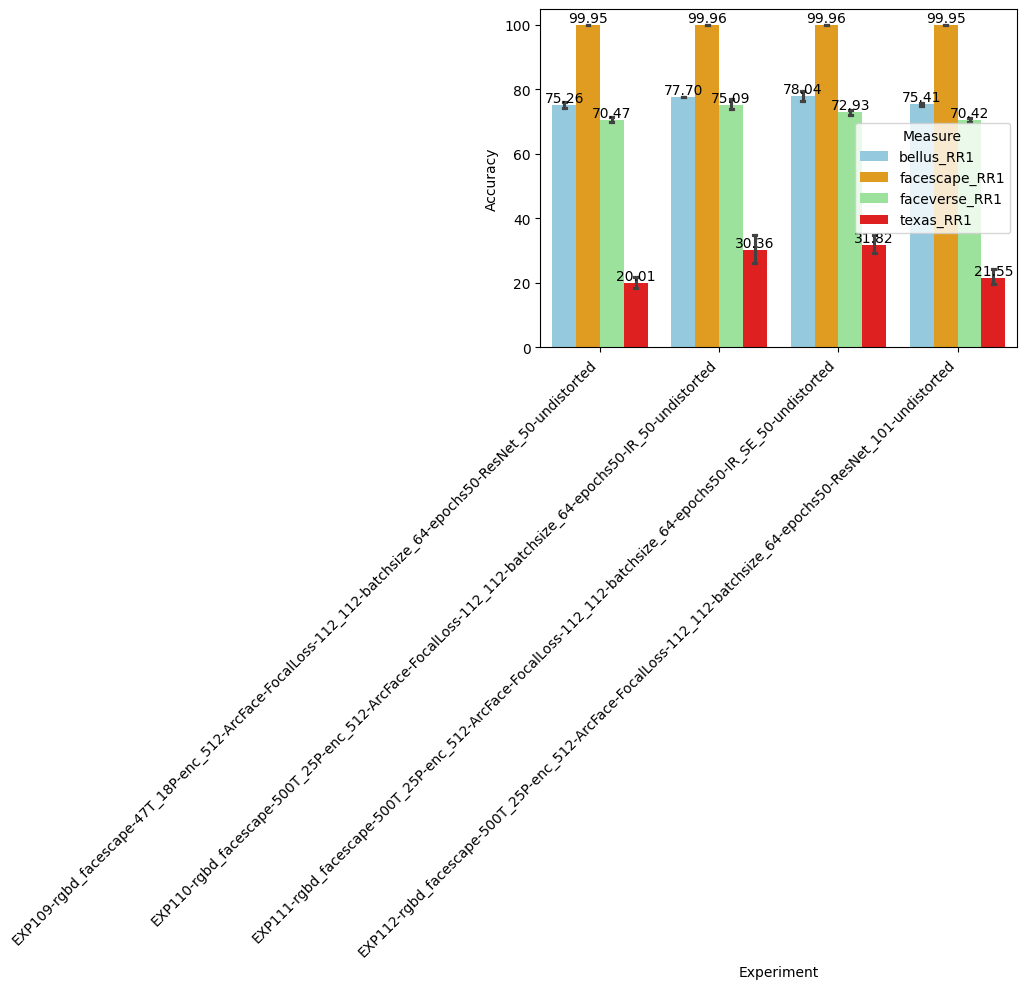

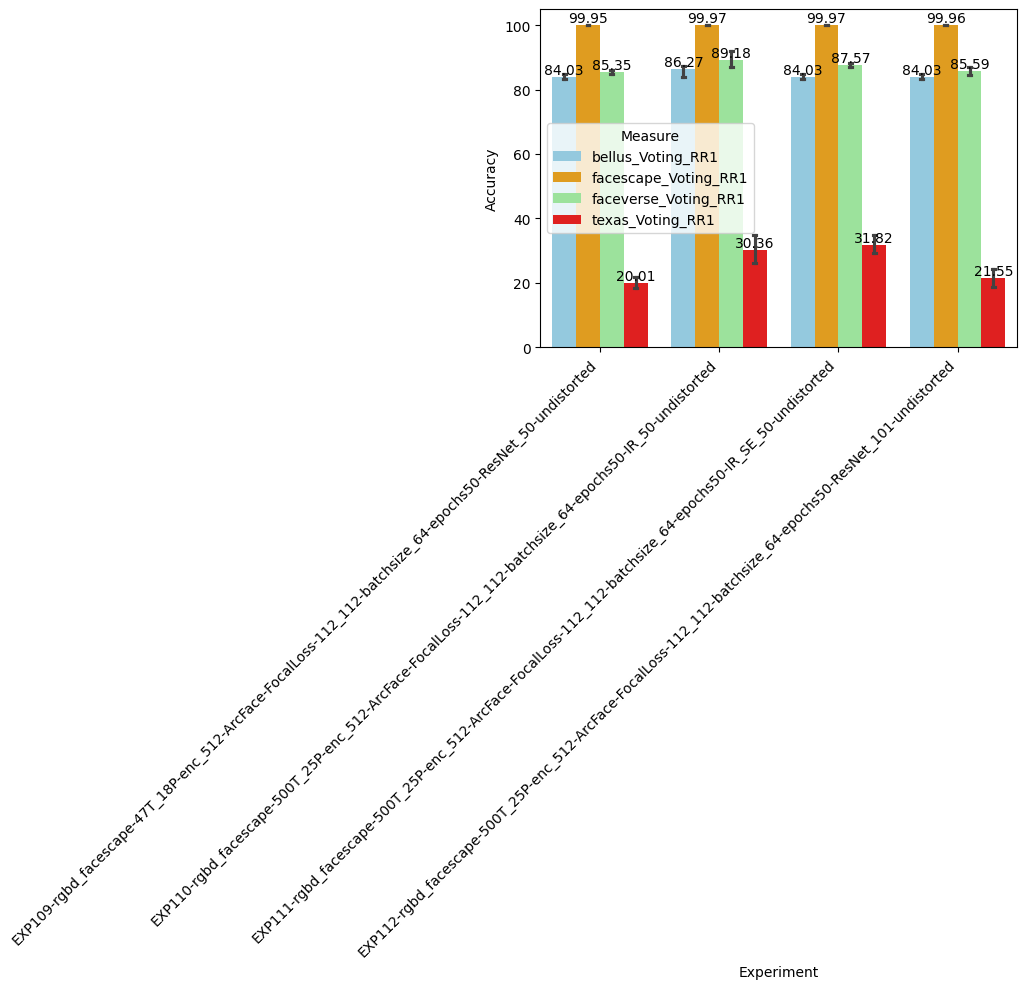

In [14]:
df_selected = select_runs(df_runs, run_configs, ['EXP109-','EXP110-','EXP111-','EXP112-','EXP113-','EXP114-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [115-120] rgb_monoffhq\<+rgb_bellus\>-\<1000T, 2000T\>_25P-enc_512-ArcFace-FocalLoss-112_112-batchsize_64-epochs50-\<MODEL\>-undistored

Selected: 18 ['109425427057362672', '109425427057362672', '109425427057362672', '371455595809564792', '371455595809564792', '371455595809564792', '376879853431519252', '376879853431519252', '376879853431519252', '628382155246511118', '628382155246511118', '628382155246511118', '877128359593637065', '877128359593637065', '877128359593637065', '971096871941012334', '971096871941012334', '971096871941012334']


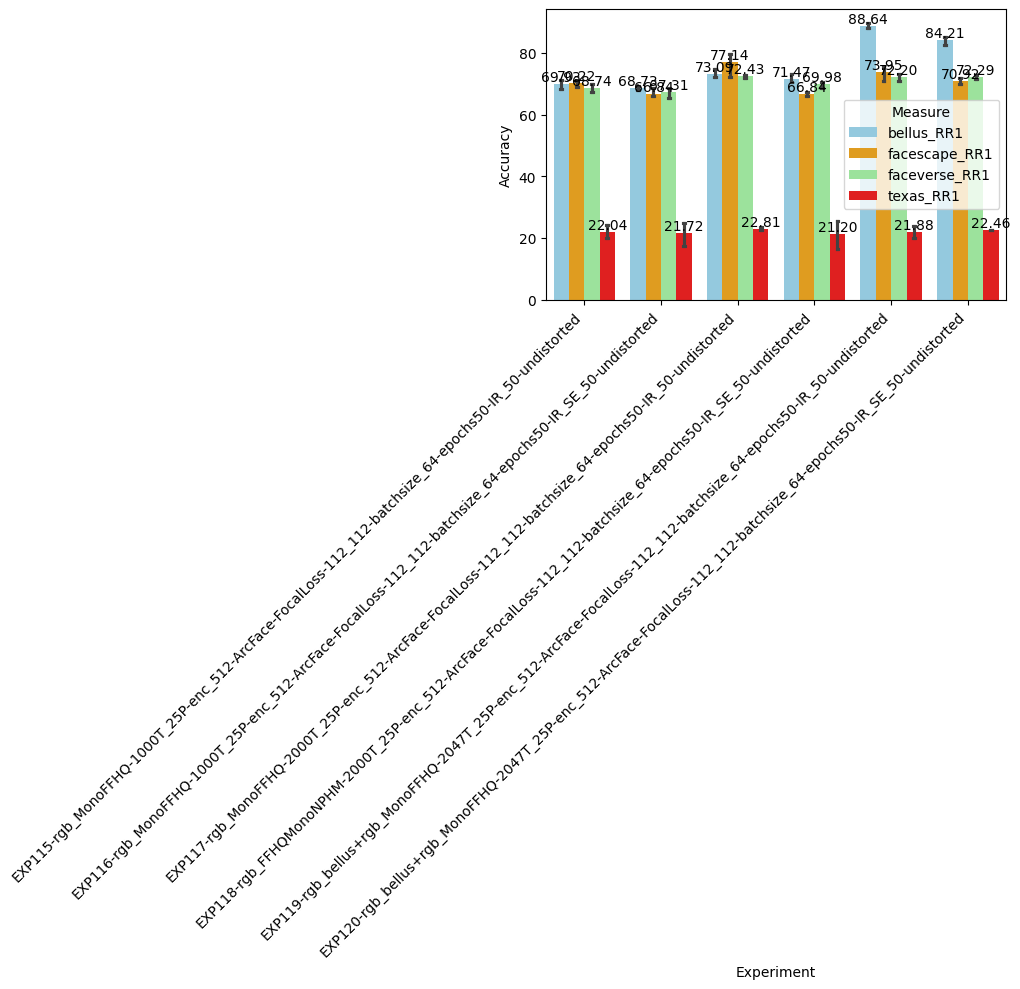

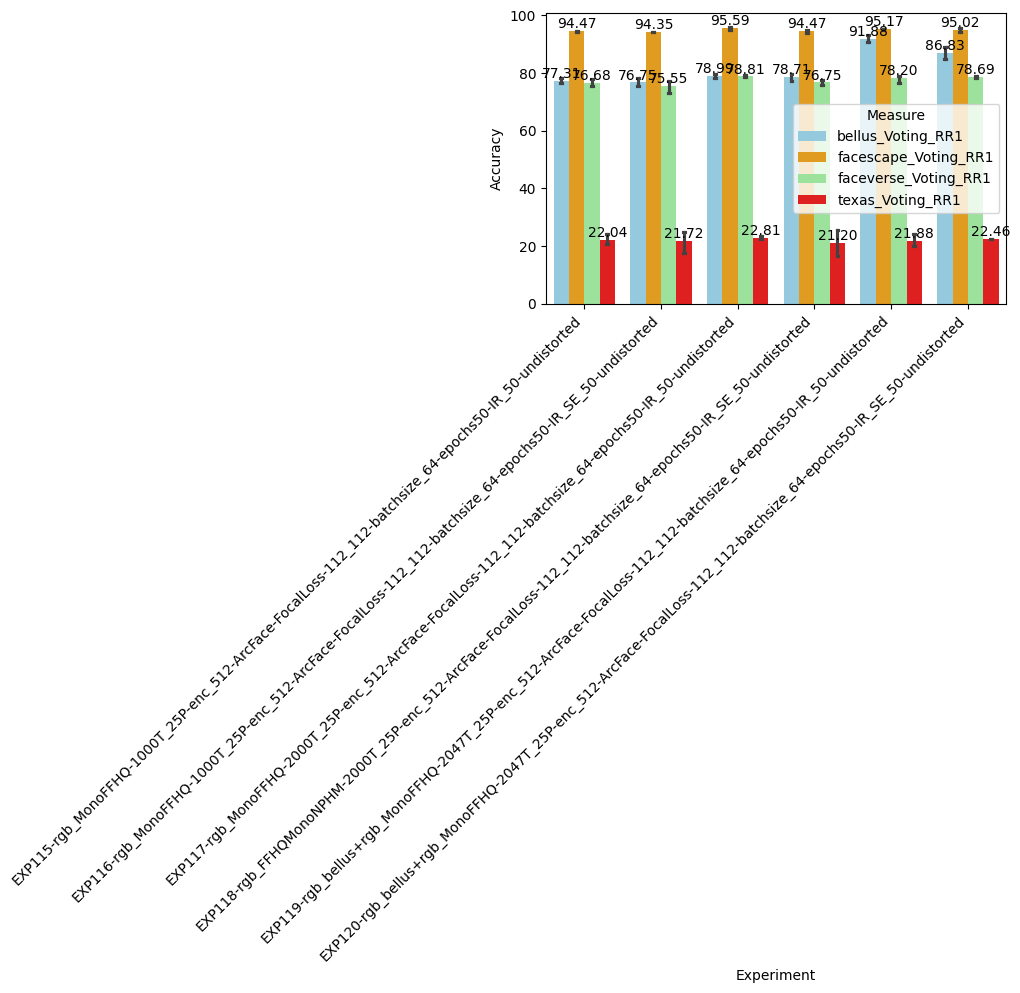

In [17]:
df_selected = select_runs(df_runs, run_configs, ['EXP115-','EXP116-','EXP117-','EXP117-','EXP118-','EXP119-','EXP120-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [115-116+121-122] rgb\<d\>_monoffhq-\<1000T, 2000T\>_25P-enc_512-ArcFace-FocalLoss-112_112-batchsize_64-epochs50-\<MODEL\>-undistored

Selected: 6 ['376879853431519252', '376879853431519252', '376879853431519252', '628382155246511118', '628382155246511118', '628382155246511118']


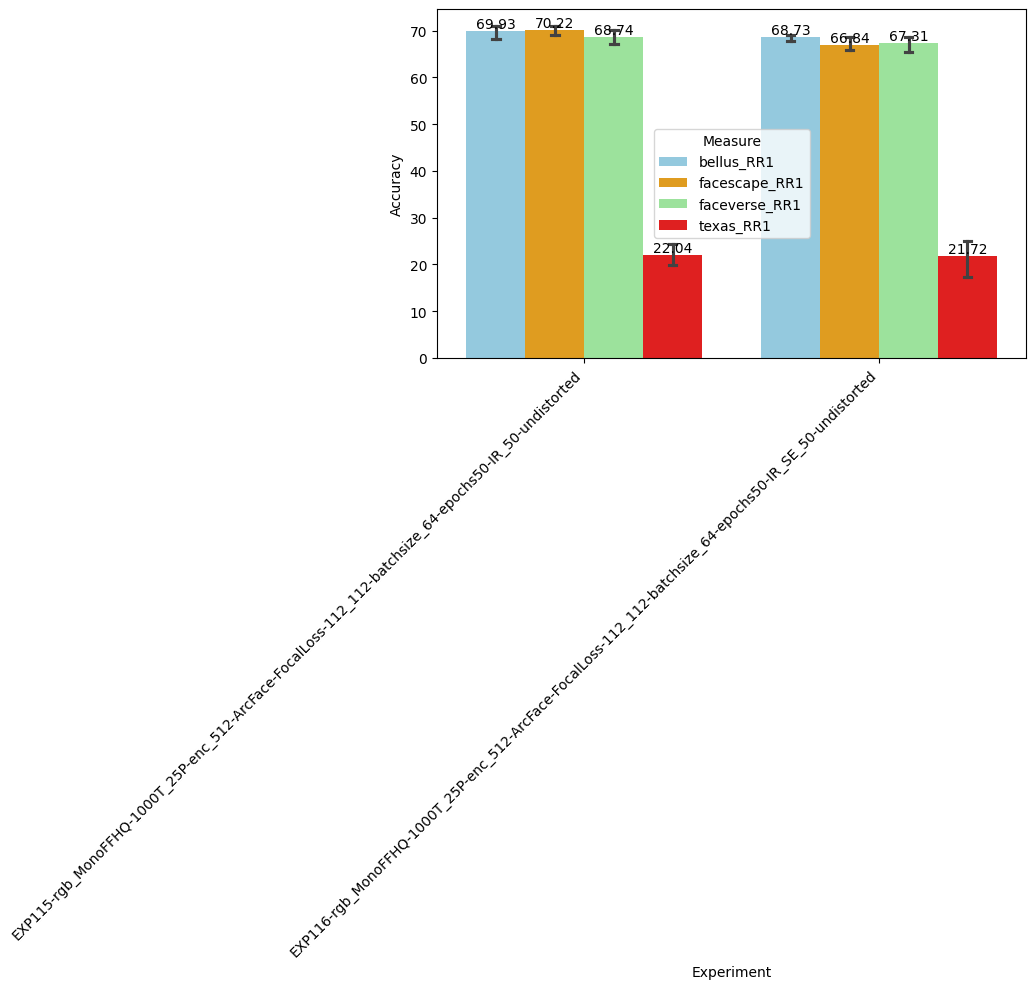

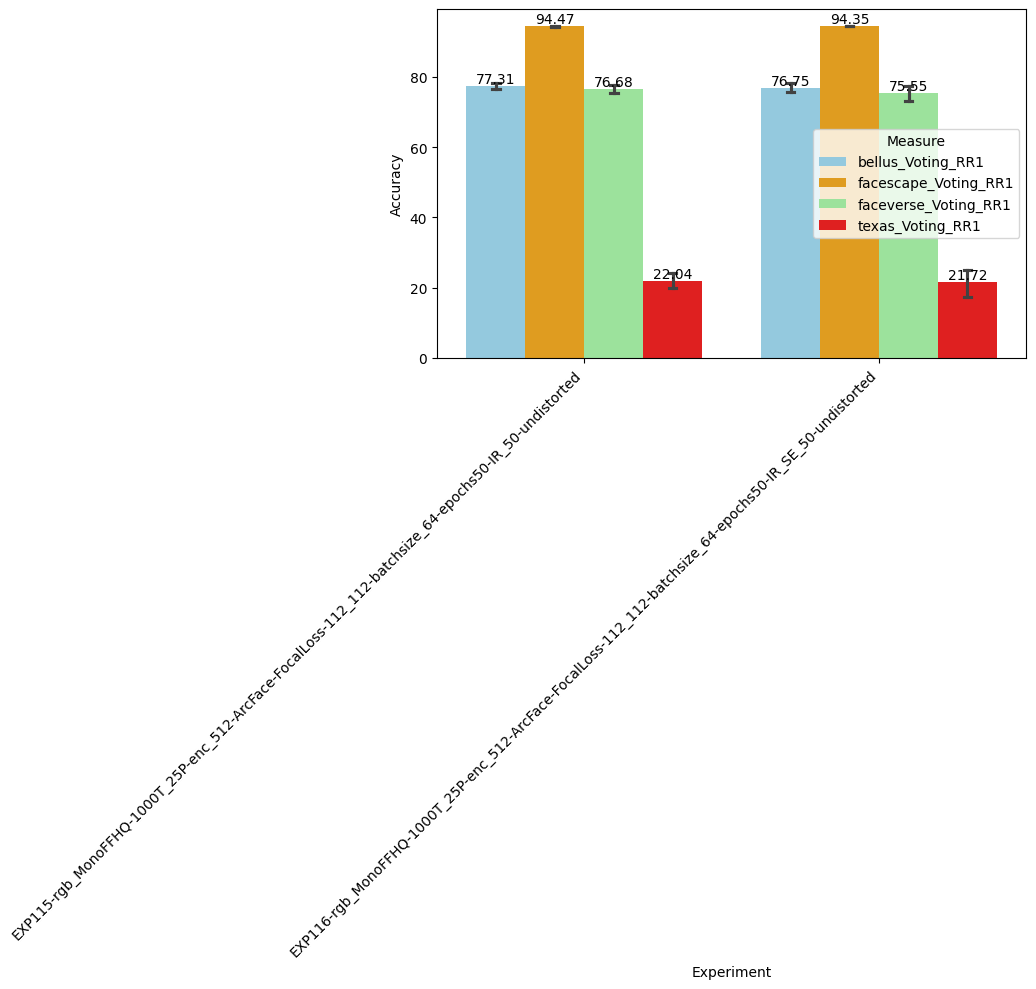

In [10]:
df_selected = select_runs(df_runs, run_configs, ['EXP115-','EXP116-','EXP121-','EXP122-'])
analyze_accuracies(df_selected, run_configs, voting=False)
analyze_accuracies(df_selected, run_configs, voting=True)

### EXP [123-126] photos_ffhq-\<1000T, 2000T\>_25P-enc_512-ArcFace-FocalLoss-112_112-batchsize_64-epochs50-\<MODEL\>-undistored

## All Experiments

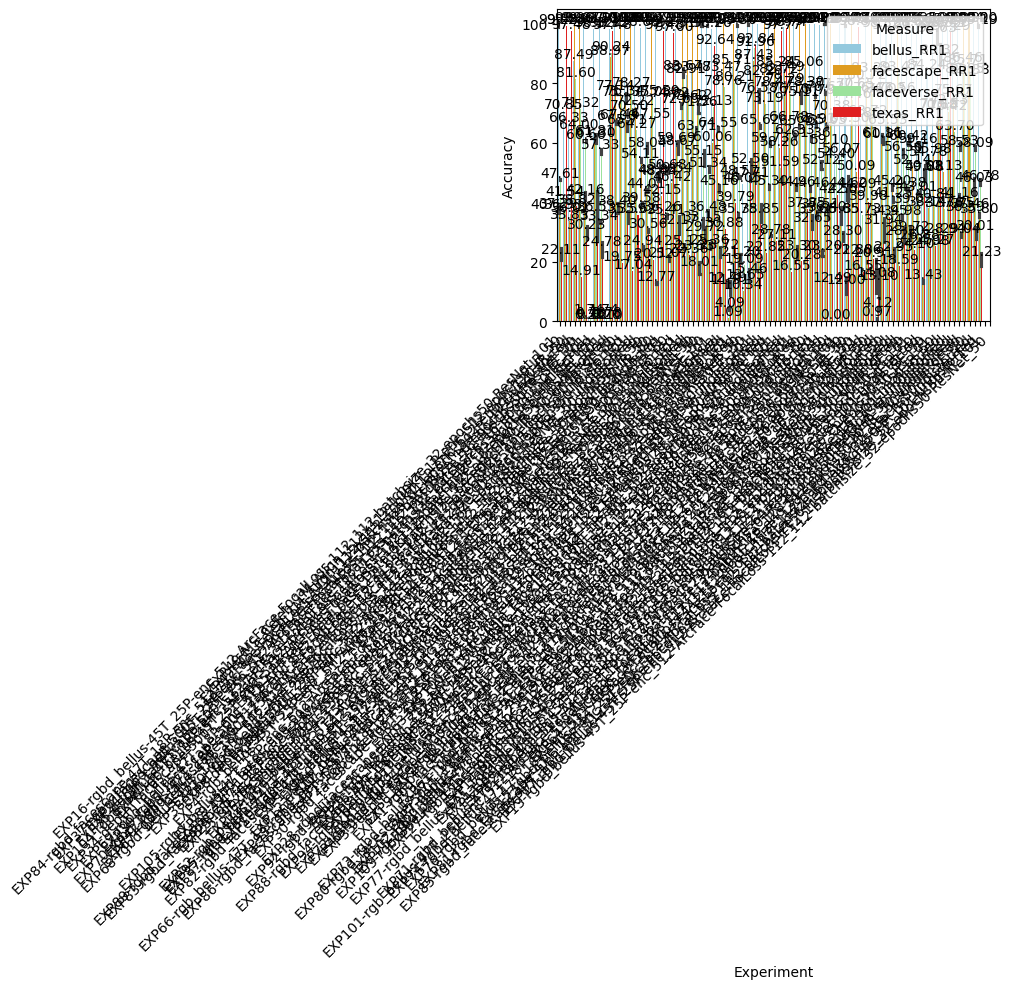

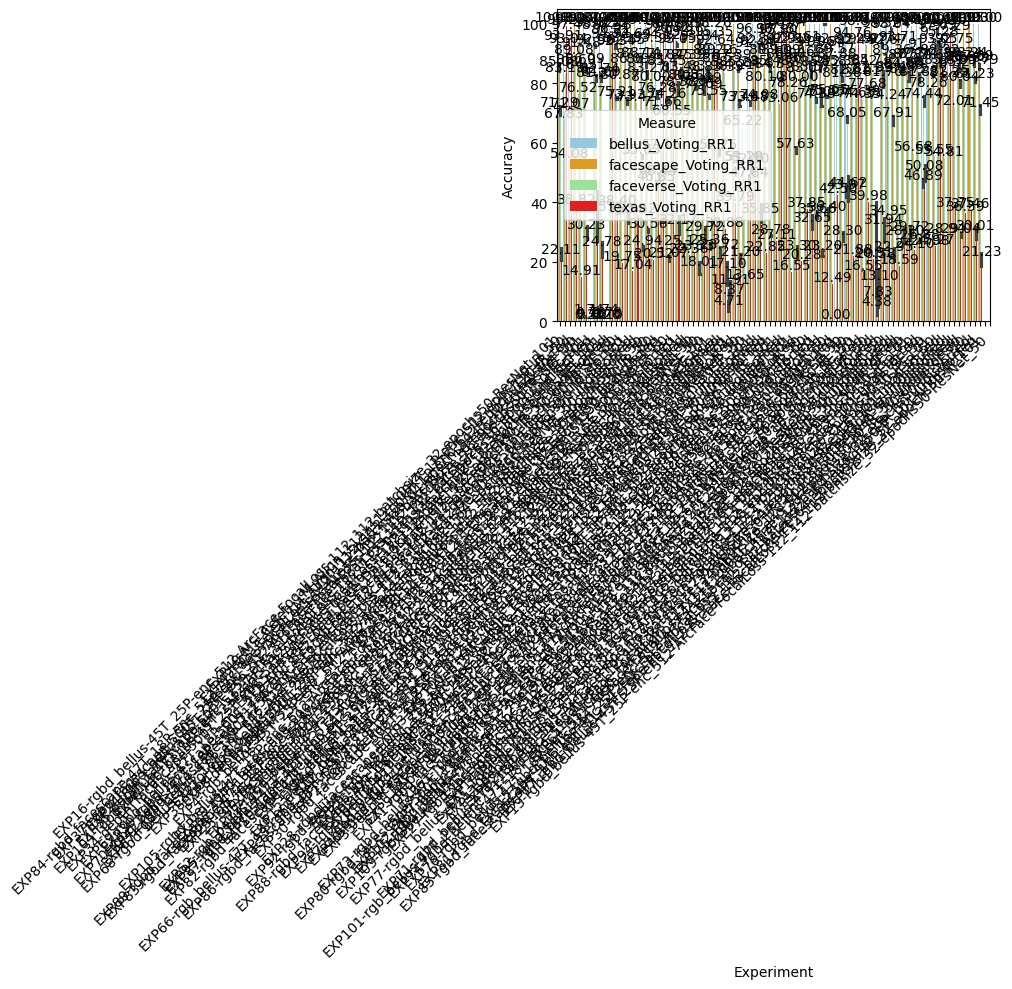

Correlation coefficient: nan


LinAlgError: SVD did not converge in Linear Least Squares

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


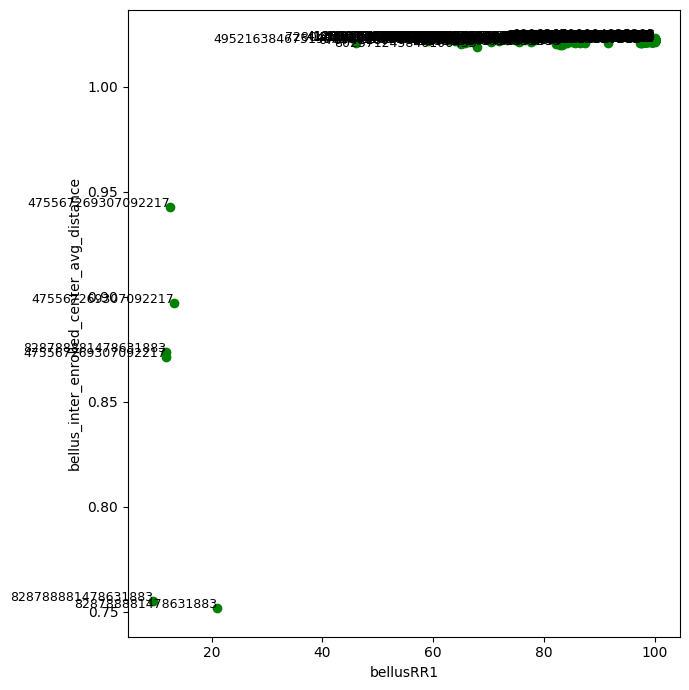

<Figure size 700x700 with 0 Axes>

In [33]:
analyze_accuracies(df_runs, run_configs, voting=False)
analyze_accuracies(df_runs, run_configs, voting=True)
analyse_embedding(df_runs)

## EXP3:testmodels-RGB_11T_46V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8-Epochs3

In [ ]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP3:testmodels-RGB_11T_57V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8', 'rgb')

## EXP4:testmodels-DEPTH_11T_46V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8

In [ ]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP4:testmodels-DEPTH_11T_57V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8', 'depth')

## EXP5:testmodels-RGB_11T_46V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8-OptimizedTripletSampler

In [ ]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP5:testmodels-RGB_11T_57V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8-OptimizedTripletSampler', 'rgb')

## EXP6:testmodels-DEPTH_11T_46V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8-OptimizedTripletSampler

In [ ]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP6:testmodels-DEPTH_11T_57V_SingleTrainSample-enc128-BigHead-BatchHardTripletMarginLoss-BATCHSIZE8-OptimizedTripletSampler', 'depth')

## EXP7:testmodels-Photos_11T_46V_SingleTrainSample-enc128-BigHead-TripletLoss-BATCHSIZE8

In [ ]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP7:testmodels-Photos_11T_57V_SingleTrainSample-enc128-BigHead-TripletLoss-BATCHSIZE8', 'rgb')

## EXP8:testmodels-Photos_11T_46V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8

In [ ]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP8:testmodels-Photos_11T_57V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8', 'rgb')

## EXP9:RGB_15T_51V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8

In [ ]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP9:RGB_15T_51V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8', 'rgb')

## EXP10:Depth_15T_51V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8

In [ ]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP10:DEPTH_15T_51V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8', 'depth')

## EXP11:RGB_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8

In [ ]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP11:RGB_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8', 'rgb')

## EXP12:DEPTH_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8

In [ ]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP12:DEPTH_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8', 'depth')

## Analye Parametersize correlation:

In [ ]:
num_params = {"VGG16Face": 224696256,
        "VGG16Face_IMAGENET1K_V1": 224696256,
        "ResNet18": 1833152,
        "ResNet18_IMAGENET1K_V1": 1833152,
        "ResNet34": 21941312,
        "ResNet34_IMAGENET1K_V1": 21941312,
        "ResNet50": 32425280,
        "ResNet50_IMAGENET1K_V1": 32425280,
        "ConvNeXtTiny": 29196640,
        "ConvNeXtTiny_IMAGENET1K_V1": 29196640,
        "EfficientnetV2Small": 23784784,
        "EfficientnetV2Small_IMAGENET1K_V1": 23784784,
        "Squeezenet": 182654784,
        "Squeezenet_IMAGENET1K_V1": 182654784,
        "Shufflenet": 108736996,
        "Shufflenet_IMAGENET1K_V1": 108736996,
        "MobileNetV3":1739424,
        "MobileNetV3_IMAGENET1K_V1": 1739424,
        "WideResNet50": 68277312,
        "WideResNet50_IMAGENET1K_V1": 68277312,
        "WideResNet101": 133754944,
        "WideResNet101_IMAGENET1K_V1": 133754944,
        "GhostFaceNetV1": 2843565,
        "GhostFaceNetV2": 3817965}

dictlist = []
models = []
for key, value in num_params.items():
    temp = [key,value]
    dictlist.append(value)
    models.append(key)
models = pd.DataFrame(models)



combined_df = load_dataframe(directory)
grouped = combined_df.groupby('model_name')['accuracy_list'].max()
#print(grouped)

# Now, you want to match the model names with the 'num_params' dictionary and get a list of tuples.
x = []
y = []
labels = []
for model_name, max_accuracy in grouped.items():
    # Look up the number of parameters in 'num_params' dictionary using the model name.
    num_parameters = num_params.get(model_name)
    if num_parameters is not None:
        # If the model name exists in the 'num_params' dictionary, append the tuple to the result list.
        y.append(max_accuracy[0])
        x.append(num_parameters)
        labels.append(model_name)

plt.figure(figsize=(15, 6))
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
val_linspace = np.linspace(min(x), max(x), len(x))
plt.scatter(x, y, color='green')
plt.plot(val_linspace, poly(val_linspace), color='blue', linestyle='dashed', linewidth=2)
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=9, ha='right')
plt.xlabel('num_params')
plt.ylabel('accuracy')
plt.tight_layout()
plt.show()
correlation_coefficient, _ = pearsonr(x, y)
print(f"Correlation coefficient: {correlation_coefficient:.3f}")

## EXP13:RGBD_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8

In [ ]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP13:RGBD_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8', 'rgbd')

## EXP14:Photos_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8

In [ ]:
combined_df = load_dataframe(directory)
analyze_accuracies_withtop5(combined_df, 'EXP14:Photos_34T_92V_SingleTrainSample-enc128-BigHead-BatchHardTripletLoss-BATCHSIZE8', 'rgb')